# COGS 108 - Final Checkpoint

# Overview
Our group investigated the impact of the number of people vaccinated on the rate of COVID-19 transmission (the number of new confirmed cases). In order to achieve this goal, we collected the daily and weekly new confirmed cases data of countries that have available dataset, and the dataset of total number of vaccinations for each country. Also, by considering the size of countries might by a confounder, we collected the number of people vaccinated within the same population size and density for each country. We concluded there is a negative correlation by establishing a link between the number of new confirmed cases (on daily and weekly bases) and the number of vaccinated people in each country. However, by analyzing the correlation coefficient, we concluded that the correlation was not very strong, indicating that there exist additional factors that can affect the number of new cases reported.

# Names

- Feifan Li
- Kexin Cheng
- Kesin Chang
- Ziyue Chen

# Introduction

COVID-19, an infectious coronavirus disease, has spread throughout the whole world in a short amount of time since the end of 2019 and led to an ongoing pandemic. It significantly influenced all aspects of people's daily life. According to WHO, as of 1/29/2021, more than a hundred million people in the world have been infected with the virus, and more than two million of them have died from it. In order to solve this problem, scientists, businesses, and global health organizations are working together to try to find a vaccine that will be safe and effective against the virus. So far, a lot of vaccines have been reported to be effective and open to the public for vaccinating. According to the South China Morning Post, the vaccine from both China and the USA has an 80% chance to prevent infection.

As it is commonly known, COVID-19 has mainly spread through community transmission. Therefore, it will be necessary for governments to set restrictions in order to slow the speed of spreading. For example, California State Government gave the Stay Home Order in March 2020 that required the citizens to stay at home unless it was for essential jobs or needs. They also issued a requirement to wear a mask in public spaces. While these restrictions helped the speed of spreading to be slower, it also caused chaos and dissatisfactions among the citizens as some of them felt their freedom was deprived. Hence, our team wonders whether there could be an alternative solution that could satisfy these people while slowing the spread? 

Based on the research done by Jacqui Wise, they found out that, in Scotland, the number of deaths of COVID-19 in the 85 and over age group has fallen by 45% after the vaccination program began. Therefore, it makes us wonder, whether the vaccines are only effective for stopping the death from the virus or the transmission of the virus as a whole. To answer, we formulate a hypothesis that, if more people inside the country can get the vaccine, it may inhibit the rapid spread of the virus.


References (include links):

1) https://www.scmp.com/news/hong-kong/health-environment/article/3115925/covid-19-vaccines-hong-kong-how-soon-will-shots<br>
2) https://www.who.int/emergencies/diseases/novel-coronavirus-2019/covid-19-vaccines<br>
3) https://covid19.ca.gov/stay-home-except-for-essential-needs/<br>
4) https://www.bmj.com/content/372/bmj.n506<br>

# Hypothesis

Our hypothesis is that the countries that have more people vaccinated will have a smaller number of COVID-19 new confirmed cases, comparing to the countries which have fewer number of people vaccinated or the countries which do not have vaccination. The number of people vaccinated of countries and the number of new confirmed cases of those countries have a negative relationship.

We chose this hypothesis because the current vaccines have proven to be useful and thus should be effective in controlling the current condition. As more people are vaccinated, the possibility of viruses spreading widely is expected to be reduced.

<a id='research_question'></a>
# Research Question

Does the number of people vaccinated in different countries have an effect on the number of new confirmed cases of COVID-19 of those countries?

# Dataset(s)

In order to understand the relationship between vaccines and covid cases, we choose the three datasets where one provides the country-by-country data on global COVID-19 vaccinations, and the other two show the new covid cases daily and weekly respectively.


<h5> Vaccination Rate </h5>

* https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv<br> 

* 1738 observations collected from 12/13/2020 to 2/3/2021 (accessed on 1/29/2021)

* The columns contains in the dataset: location, iso_code, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations_raw, daily_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, daily_vaccinations_per_million. 

* This dataset has quantitative data of people from different countries get vaccined over time.

* Collected by the Our World in Data team from official reports, stored as a csv file.

<h5> World New Cases Data </h5>

* https://github.com/owid/covid-19-data/blob/master/public/data/jhu/new_cases.csv<br>

* 386 observations till 02/10/2021 (accessed on 1/29/2021)

* The columns of the dataset include dates, total new cases around the world daily, and new cases broken down by 198 countries.

* Collected by Johns Hopkins University, stored as a csv file.

<h5> Weekly Data </h5>

* https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/weekly_cases.csv<br>

* 386 observations till 02/10/2021 (accessed on 1/29/2021).

* The columns of the dataset include dates, new cases around the world updated weekly, and the 198 countries.

* Collected by Johns Hopkins University, stored as a csv file.

# Setup

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import statmodels & patsy
import patsy
import statsmodels.api as sm

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# improve resolution
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.figsize'] = (17, 7)

# Data Cleaning

## Vaccination Rate
For this data set, we need drop a few columns that we will not use for this project like raw vaccinations rate or vaccinations rate per-million. Also, since we want to use country's full name instead of abbreviation, we also drop the 'iso_code' column. After that, in some small countries, they provide limited amounts of data (many missing values), which may negatively influence our data interpretation. Hence, we decide to remove those countries from the dataset. At last, in order to make sure readers can have better understanding of the data, we rename some columns to be more concise and straightforward.

In [2]:
# reading data from the database
vaccine = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

# drop columns that we will not use from this project
vaccine = vaccine.drop(columns = ['daily_vaccinations_raw','daily_vaccinations_per_million'],axis=1)

# we decide to use country full name instead of abbreviation
vaccine = vaccine.drop(columns = ['iso_code'],axis=1)

In [3]:
# we drop some countries because the statistics about their countries are nearly none, which will create many Nah data points
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Algeria'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Argentina'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Andorra'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Bermuda'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Iceland'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Kuwait'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Monaco'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Switzerland'].index)
vaccine = vaccine.drop(vaccine[vaccine['location'] == 'Ireland'].index)

# reset the index
vaccine = vaccine.reset_index()
vaccine = vaccine.drop(columns = ['index'])

In [4]:
# rename the columsn for better interpretation
vaccine = vaccine.rename(columns = {'location':'Country','date':'Date','people_vaccinated':'Vaccinated','daily_vaccinations':'Daily_vaccinations',
                         'total_vaccinations_per_hundred':'Total_vaccinations_per_hundred','people_vaccinated_per_hundred':'People_vaccinated_per_hundred',
                         'people_fully_vaccinated_per_hundred':'People_fully_vaccinated_per_hundred','total_vaccinations':'Total_vaccinations',
                         'people_fully_vaccinated':'People_fully_vaccinated'})

# rearrange the columns order
vaccine = vaccine[['Country','Date','Daily_vaccinations','Vaccinated','People_fully_vaccinated','Total_vaccinations','Total_vaccinations_per_hundred',
        'People_vaccinated_per_hundred','People_fully_vaccinated_per_hundred']]

In [5]:
# data after the cleaning
vaccine

,Country,Date,Daily_vaccinations,Vaccinated,People_fully_vaccinated,Total_vaccinations,Total_vaccinations_per_hundred,People_vaccinated_per_hundred,People_fully_vaccinated_per_hundred
0,Albania,2021-01-10,NaN,0.0,NaN,0.0,0.00,0.00,NaN
1,Albania,2021-01-11,64.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2021-01-12,64.0,128.0,NaN,128.0,0.00,0.00,NaN
3,Albania,2021-01-13,63.0,188.0,NaN,188.0,0.01,0.01,NaN
4,Albania,2021-01-14,66.0,266.0,NaN,266.0,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...
5531,Zimbabwe,2021-03-06,2330.0,32014.0,NaN,32014.0,0.22,0.22,NaN
5532,Zimbabwe,2021-03-07,1914.0,32240.0,NaN,32240.0,0.22,0.22,NaN
5533,Zimbabwe,2021-03-08,2009.0,35518.0,NaN,35518.0,0.24,0.24,NaN
5534,Zimbabwe,2021-03-09,1526.0,35761.0,NaN,35761.0,0.24,0.24,NaN


In [6]:
vaccine.describe()

,Daily_vaccinations,Vaccinated,People_fully_vaccinated,Total_vaccinations,Total_vaccinations_per_hundred,People_vaccinated_per_hundred,People_fully_vaccinated_per_hundred
count,5.356000e+03,3.325000e+03,2.253000e+03,3.696000e+03,3696.000000,3325.000000,2253.000000
mean,1.261033e+05,3.628926e+06,1.511029e+06,4.954415e+06,8.241310,6.425071,2.767523
std,5.741328e+05,1.486606e+07,6.219870e+06,2.350984e+07,15.445428,10.678109,6.428551
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.351000e+03,3.800000e+04,1.685300e+04,3.916700e+04,0.580000,0.590000,0.270000
50%,7.712000e+03,2.439730e+05,8.618800e+04,2.686165e+05,2.980000,2.660000,1.030000
75%,4.500625e+04,1.269905e+06,5.195530e+05,1.574864e+06,8.142500,6.360000,2.450000
max,8.700518e+06,1.979770e+08,7.313579e+07,3.287672e+08,133.250000,85.870000,47.380000


## World New Cases Data
To clean the **world new cases** data, the dates are formatted using the `to_datetime()` function from `pandas`, the dates before 2020-12-13 (the start date that has vaccinations reported) are not included, and the rows where all the columns have missing data are dropped.

In [7]:
# Import world new cases data
new_cases = pd.read_csv("https://raw.githubusercontent.com/zic115/covid-19-data/master/public/data/jhu/new_cases.csv")

In [8]:
# Change "date" to "Date"
new_cases = new_cases.rename(columns = {"date":"Date"})
# Format the dates
new_cases["Date"] = pd.to_datetime(new_cases["Date"])

In [9]:
# Include only dates after 2020-12-13 (inclusive) and reset index
new_cases = new_cases[new_cases["Date"] >= "2020-12-13"].reset_index(drop = True)

In [10]:
# Drop rows where all the columns have missing data
new_cases = new_cases.dropna(how = "all")

In [11]:
# Take a look at new_cases after cleaning
new_cases.head()

,Date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-12-13,544274.0,298.0,16222.0,788.0,464.0,50.0,27.0,0.0,3558.0,...,187429.0,528.0,145.0,0.0,0.0,609.0,2.0,0.0,57.0,27.0
1,2020-12-14,523954.0,191.0,11318.0,661.0,495.0,44.0,89.0,0.0,5062.0,...,193151.0,321.0,138.0,0.0,0.0,339.0,5.0,1.0,48.0,112.0
2,2020-12-15,636389.0,234.0,18002.0,809.0,468.0,0.0,85.0,0.0,6981.0,...,209189.0,389.0,147.0,0.0,0.0,355.0,3.0,1.0,106.0,164.0
3,2020-12-16,732766.0,209.0,21225.0,637.0,442.0,64.0,45.0,3.0,6843.0,...,245740.0,475.0,297.0,0.0,0.0,237.0,0.0,0.0,28.0,227.0
4,2020-12-17,738690.0,217.0,20508.0,787.0,426.0,20.0,77.0,0.0,7326.0,...,239077.0,543.0,0.0,0.0,0.0,364.0,2.0,2.0,48.0,117.0


In [12]:
# Determine the shape
new_cases.shape

(60, 200)

In [13]:
# Describe the statistics
new_cases.describe()

,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000
mean,591235.183333,119.550000,22384.850000,682.150000,302.400000,51.066667,67.483333,3.366667,8440.533333,353.066667,...,184422.850000,626.633333,73.766667,0.0,0.0,404.983333,11.600000,0.833333,789.266667,394.083333
std,123315.532909,194.260914,6903.109564,245.278246,96.428106,30.371076,32.853291,6.305679,3135.294269,267.908084,...,52755.620332,211.502852,49.031766,0.0,0.0,121.651000,21.693708,1.122447,555.316488,330.767740
min,315510.000000,0.000000,11318.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,58.000000,...,89581.000000,321.000000,0.000000,0.0,0.0,147.000000,0.000000,0.000000,28.000000,27.000000
25%,514223.000000,46.000000,16759.500000,538.000000,244.500000,35.000000,41.500000,0.000000,6431.500000,157.750000,...,145599.000000,509.750000,45.750000,0.0,0.0,324.500000,1.000000,0.000000,233.750000,122.750000
50%,589404.000000,76.500000,21242.500000,660.500000,262.500000,48.500000,68.000000,0.500000,8203.500000,285.000000,...,188790.500000,586.000000,59.500000,0.0,0.0,412.000000,3.000000,0.000000,857.500000,283.000000
75%,692467.250000,141.000000,27373.000000,867.750000,396.500000,64.000000,89.000000,3.000000,10896.500000,457.250000,...,227323.250000,683.000000,100.750000,0.0,0.0,474.750000,9.250000,1.250000,1260.250000,651.500000
max,858062.000000,1485.000000,36473.000000,1239.000000,495.000000,141.000000,188.000000,34.000000,13835.000000,1174.000000,...,300282.000000,1514.000000,297.000000,0.0,0.0,673.000000,110.000000,5.000000,1796.000000,1365.000000


## Weekly Data
For the weekly data, if a row has only missing values and if a row or a column have nearly all missing values in it (in this case, it means the rows/columns that have over 2/3 missing values out of the total), we will drop it. Also, to compare the different dataset more easily, we will only include the data with the dates that the other datasets have too.

In [14]:
# Import the weekly data
weekly_data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/weekly_cases.csv", index_col=0)

In [15]:
# Drop rows where all the columns have missing data, and the rows/columns that too little amount of values
weekly_data = weekly_data.dropna(how = 'all')
weekly_data = weekly_data.dropna(thresh = 128, axis = 1 )
weekly_data = weekly_data.dropna(thresh = 66)

In [16]:
# Drop rows that are not between 2020-12-13 and 2021-02-10
weekly_data = weekly_data.loc['2020-12-13':'2021-02-10']
weekly_data = weekly_data.reset_index().rename(columns={'date': 'Date'})


In [17]:
# Data after cleaning
weekly_data.head()

,Date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-12-13,8699761.0,2411.0,215301.0,10905.0,9881.0,626.0,1085.0,7.0,79353.0,...,233185.0,2913324.0,3992.0,2086.0,0.0,5746.0,54.0,6.0,666.0,1424.0
1,2020-12-14,8715631.0,2444.0,216269.0,11009.0,9398.0,637.0,1138.0,7.0,78689.0,...,241134.0,2946279.0,4172.0,2000.0,0.0,5731.0,55.0,7.0,675.0,1408.0
2,2020-12-15,8740278.0,2436.0,223433.0,10986.0,8913.0,592.0,1111.0,6.0,77633.0,...,246206.0,2968140.0,4394.0,1965.0,0.0,5859.0,54.0,8.0,763.0,1393.0
3,2020-12-16,8822335.0,2443.0,228245.0,10918.0,8423.0,604.0,1088.0,7.0,76943.0,...,255269.0,3011815.0,4668.0,2203.0,0.0,5650.0,47.0,8.0,756.0,1620.0
4,2020-12-17,8867645.0,2541.0,233052.0,10923.0,8006.0,562.0,1123.0,7.0,76640.0,...,275850.0,3028039.0,4981.0,2107.0,0.0,5533.0,46.0,10.0,774.0,1442.0


# Exploratory Data Analysis

## Vaccination Rate

For the first step, we would like to show the general distribution of vaccination rate around world.

In [18]:
##Remove the statistics and store it in a temporary variable
temp_vaccine = vaccine.drop(vaccine[vaccine['Country'] == 'World'].index)

In [19]:
##Dataset
temp_vaccine.describe()

,Daily_vaccinations,Vaccinated,People_fully_vaccinated,Total_vaccinations,Total_vaccinations_per_hundred,People_vaccinated_per_hundred,People_fully_vaccinated_per_hundred
count,5.269000e+03,3.237000e+03,2.186000e+03,3.608000e+03,3608.000000,3237.000000,2186.000000
mean,6.964995e+04,2.023058e+06,8.275910e+05,2.478469e+06,8.408994,6.577862,2.842996
std,2.056663e+05,5.853761e+06,2.880840e+06,7.818682e+06,15.593570,10.780756,6.511470
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.331000e+03,3.628400e+04,1.598625e+04,3.703200e+04,0.600000,0.640000,0.290000
50%,7.524000e+03,2.317520e+05,8.167400e+04,2.441540e+05,3.100000,2.780000,1.105000
75%,3.850800e+04,1.081366e+06,4.762110e+05,1.357249e+06,8.370000,6.530000,2.480000
max,2.169981e+06,6.245115e+07,3.290416e+07,9.572129e+07,133.250000,85.870000,47.380000


Text(0.5, 1.0, 'Distribution of total vaccinations')

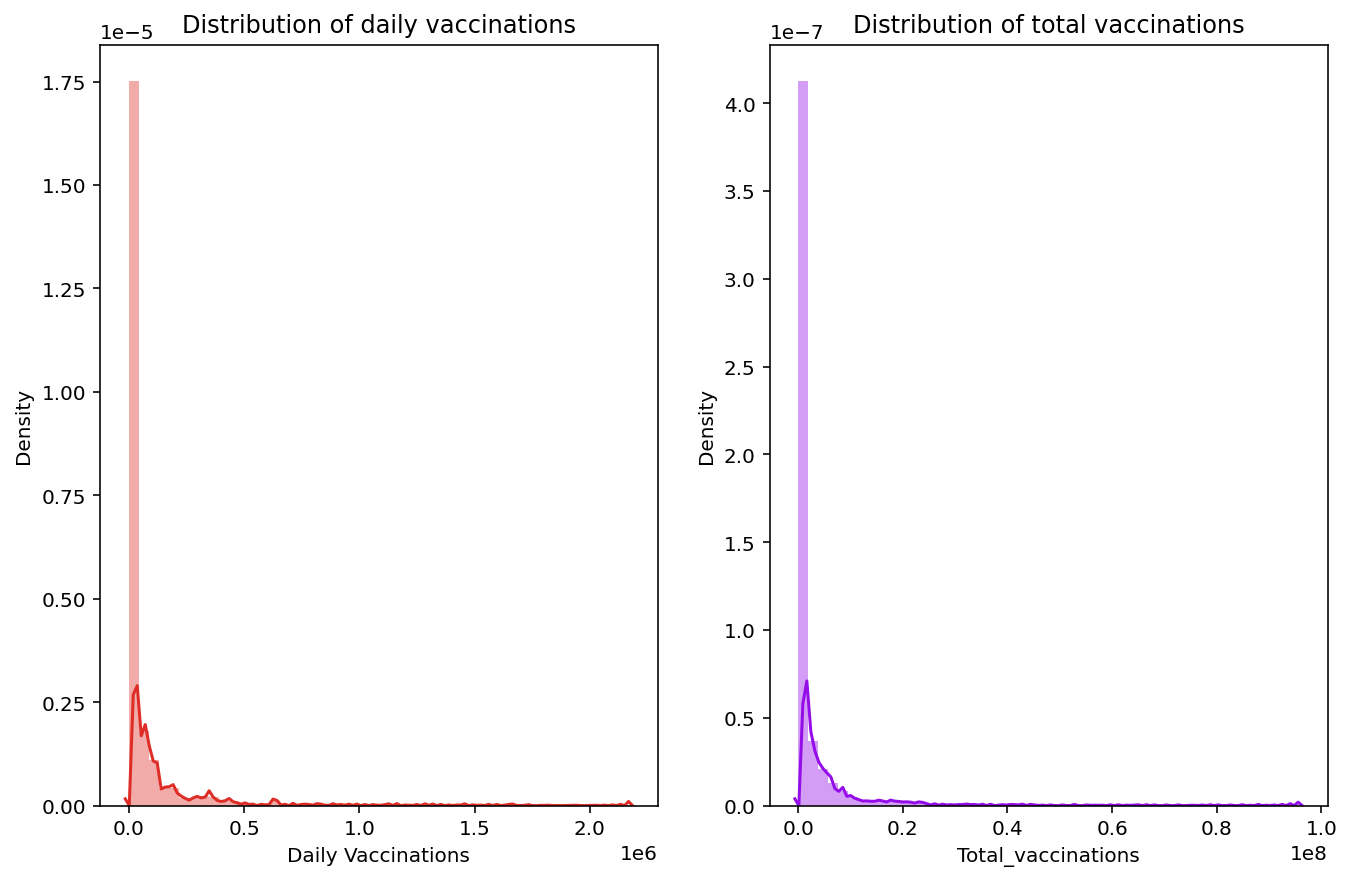

In [20]:
## Take a look at the distribution of daily vaccinated, total vaccinated
plt.subplot(1, 3, 1)
sns.distplot(temp_vaccine['Daily_vaccinations'], color='#DE2D26')
plt.xlabel('Daily Vaccinations')
plt.ylabel('Density')
plt.title("Distribution of daily vaccinations")


plt.subplot(1, 3, 2)
sns.distplot(temp_vaccine['Total_vaccinations'], color='#940CE8');
plt.xlabel('Total_vaccinations')
plt.ylabel('Density')
plt.title("Distribution of total vaccinations")

Plot(1) Distribution of people get vaccine in single day. (Unit:1x10^5 people)<br>
Plot(2) Distribution of total number of people get vaccinated (Unit:1x10^7 people)<br><br>
From the first plot, we can see that the average number of people get vaccinated in one day is around 12,000.In another words,
for most of the countries, based on their current medical capability, they can only provide 12,000 people with vaccines. And from
the second plot, it is revealed that, for each country, the average number of total vaccinations is around 8000,000. If we assume there
are 50,000,000 people in each country, only 1/6 get the vaccines. Hence, from the two graphs above, it can be concluded that the vaccination rate is relatively slow.

In [21]:
##function that sum daily vaccination (input string is the country)
def sum_daily_vaccination(string):
    
    ##filter the dataset
    data = vaccine[vaccine['Country'] == string]
    
    ##drop nan values
    data = data.dropna(subset = ['Daily_vaccinations'])
    count = len(data)-1
    total = 0
    
    ##add them all together
    while(count>0):
        total = total + data.iloc[count]['Daily_vaccinations']
        count = count - 1
        
    ##return the sum
    return total   

In [22]:
##select a few countires and calculate the sum of daily vaccination
result_austria = sum_daily_vaccination('Austria')
result_denmark = sum_daily_vaccination('Denmark')
result_england = sum_daily_vaccination('England')
result_france = sum_daily_vaccination('France')
result_Germany = sum_daily_vaccination('Germany')
result_israel = sum_daily_vaccination('Israel')
result_italy = sum_daily_vaccination('Italy')
result_mexico = sum_daily_vaccination('Mexico')
result_poland = sum_daily_vaccination('Poland')
result_spain = sum_daily_vaccination('Spain')
result_uk = sum_daily_vaccination('United Kingdom')
result_us = sum_daily_vaccination('United States')

In [23]:
##construct a new dataset that contains sum of daily vaccination
data_sum = {'Countries':['Austria','Denmark','England','France','Germany','Israel','Italy','Mexico','Poland','Spain','United Kingdom','United States'],
            'Daily_vaccine_sum':[result_austria,result_denmark,result_england,result_france,result_Germany,result_israel,result_italy,
                                 result_mexico,result_poland,result_spain,result_uk,result_us]}
Daily_vaccine_df = pd.DataFrame(data_sum)

Text(0.5, 1.0, 'Total number of vaccinations for countries')

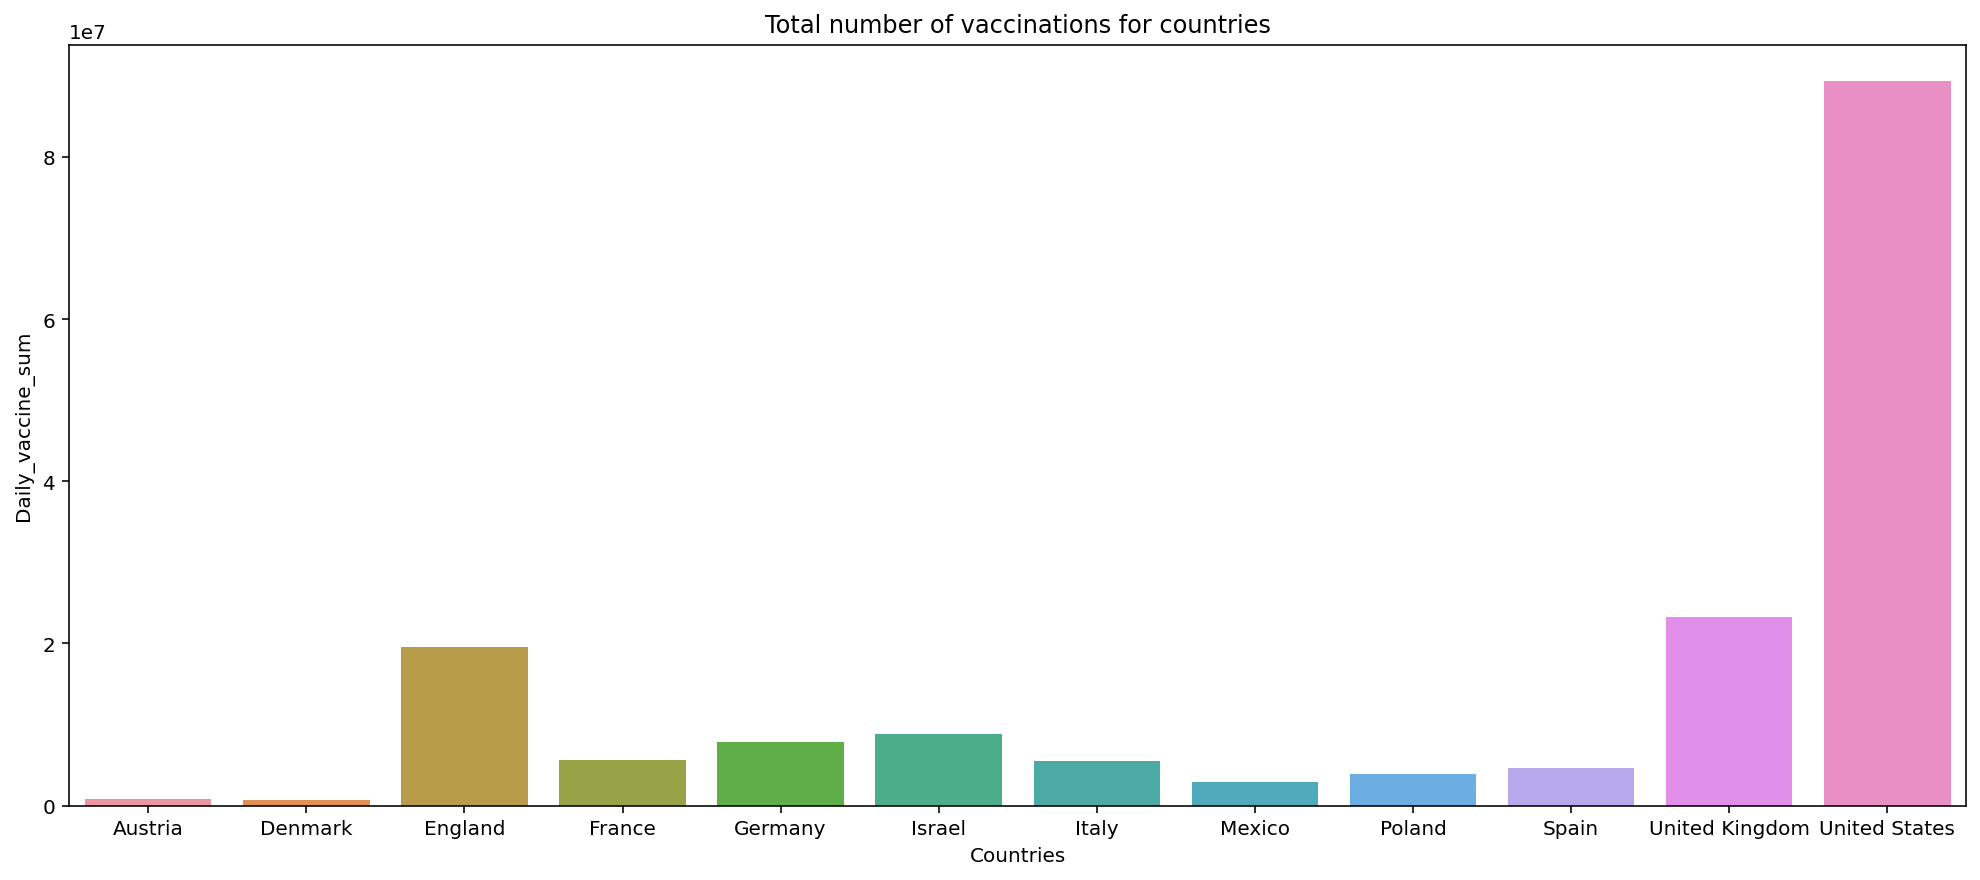

In [24]:
##Using barplot to compare their daily vaccination rate
ax = sns.barplot(x="Countries", y="Daily_vaccine_sum", data=Daily_vaccine_df)
plt.title("Total number of vaccinations for countries")

This plot basically show the total number people get vaccinated in each country. From the plot, we can see that, for small or developing countries, due to their limited medical capability, their vaccination rate were low. However, in big countries like UK or US, they can effectively provide vaccines at a fast speed. Therefore, we can draw the conclusion that the vaccination rate of a country is largely determined by its technological or medical ability.

Text(0.5, 1.0, 'Number of total vaccinatins over time')

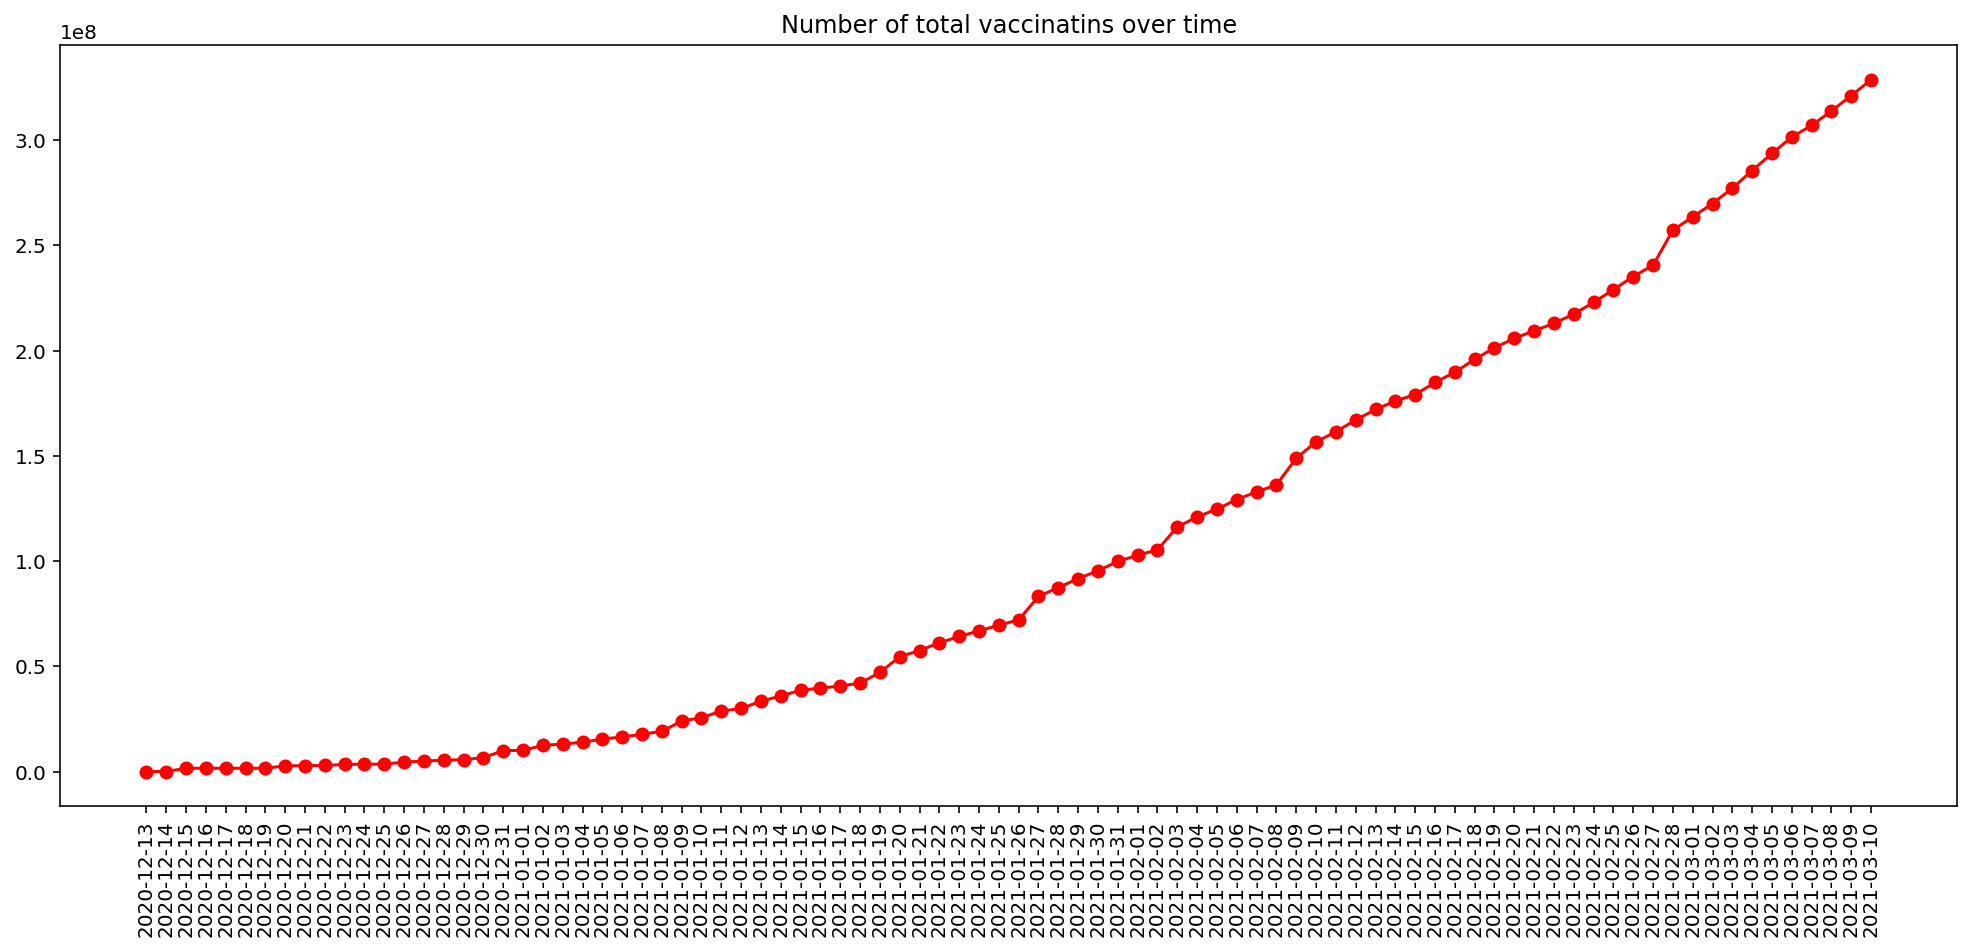

In [25]:
##Total number of vaccines
total_vaccines_date = vaccine[vaccine['Country'] == 'World']
total_vaccines_date = total_vaccines_date[['Date','Total_vaccinations']]

##Plot the number of people get vaccinated over time in the world
plt.xticks(rotation=90)
plt.plot(total_vaccines_date['Date'], total_vaccines_date['Total_vaccinations'], color='red', marker='o')
plt.title("Number of total vaccinatins over time")

From the plot above, we can see that the overall trend of vaccination rate is rising, as vaccines have been distributed around the world and have been put into use on a daily basis. In the later section analyzing the relationship between vaccination rate and new cases, the vaccination rate data will be used again.

## World New Cases Data & Weekly Data

For the second step, we would like to explore the `new_cases` dataset on 1) the total number of new cases since 2020-12-13 for continents/countries we are interested in and 2) the change in the number of world new cases reported daily.
Then, we would like to explore the `weekly_data` dataset also on the change in the number of world new cases reported weekly.

In [26]:
# Take a look at new_cases
new_cases.head()

,Date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-12-13,544274.0,298.0,16222.0,788.0,464.0,50.0,27.0,0.0,3558.0,...,187429.0,528.0,145.0,0.0,0.0,609.0,2.0,0.0,57.0,27.0
1,2020-12-14,523954.0,191.0,11318.0,661.0,495.0,44.0,89.0,0.0,5062.0,...,193151.0,321.0,138.0,0.0,0.0,339.0,5.0,1.0,48.0,112.0
2,2020-12-15,636389.0,234.0,18002.0,809.0,468.0,0.0,85.0,0.0,6981.0,...,209189.0,389.0,147.0,0.0,0.0,355.0,3.0,1.0,106.0,164.0
3,2020-12-16,732766.0,209.0,21225.0,637.0,442.0,64.0,45.0,3.0,6843.0,...,245740.0,475.0,297.0,0.0,0.0,237.0,0.0,0.0,28.0,227.0
4,2020-12-17,738690.0,217.0,20508.0,787.0,426.0,20.0,77.0,0.0,7326.0,...,239077.0,543.0,0.0,0.0,0.0,364.0,2.0,2.0,48.0,117.0


In [27]:
# Determine the column names
new_cases.columns

Index(['Date', 'World', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       ...
       'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=200)

In [28]:
# Determine the data types
new_cases.dtypes

Date           datetime64[ns]
World                 float64
Afghanistan           float64
Africa                float64
Albania               float64
                    ...      
Venezuela             float64
Vietnam               float64
Yemen                 float64
Zambia                float64
Zimbabwe              float64
Length: 200, dtype: object

In [29]:
# Describe the statistics again
new_cases.describe()

,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000
mean,591235.183333,119.550000,22384.850000,682.150000,302.400000,51.066667,67.483333,3.366667,8440.533333,353.066667,...,184422.850000,626.633333,73.766667,0.0,0.0,404.983333,11.600000,0.833333,789.266667,394.083333
std,123315.532909,194.260914,6903.109564,245.278246,96.428106,30.371076,32.853291,6.305679,3135.294269,267.908084,...,52755.620332,211.502852,49.031766,0.0,0.0,121.651000,21.693708,1.122447,555.316488,330.767740
min,315510.000000,0.000000,11318.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,58.000000,...,89581.000000,321.000000,0.000000,0.0,0.0,147.000000,0.000000,0.000000,28.000000,27.000000
25%,514223.000000,46.000000,16759.500000,538.000000,244.500000,35.000000,41.500000,0.000000,6431.500000,157.750000,...,145599.000000,509.750000,45.750000,0.0,0.0,324.500000,1.000000,0.000000,233.750000,122.750000
50%,589404.000000,76.500000,21242.500000,660.500000,262.500000,48.500000,68.000000,0.500000,8203.500000,285.000000,...,188790.500000,586.000000,59.500000,0.0,0.0,412.000000,3.000000,0.000000,857.500000,283.000000
75%,692467.250000,141.000000,27373.000000,867.750000,396.500000,64.000000,89.000000,3.000000,10896.500000,457.250000,...,227323.250000,683.000000,100.750000,0.0,0.0,474.750000,9.250000,1.250000,1260.250000,651.500000
max,858062.000000,1485.000000,36473.000000,1239.000000,495.000000,141.000000,188.000000,34.000000,13835.000000,1174.000000,...,300282.000000,1514.000000,297.000000,0.0,0.0,673.000000,110.000000,5.000000,1796.000000,1365.000000


We will first calculate the total number of new cases for the six continents included in the dataset, and we will store those values in a new dataframe to generate a barplot for comparison. In this part, we are getting a sense of the COVID condition around the world.

In [30]:
# Select the six continents and calculate the total number of new cases
total_new_africa = new_cases["Africa"].sum()
total_new_asia = new_cases["Asia"].sum()
total_new_australia = new_cases["Australia"].sum()
total_new_europe = new_cases["Europe"].sum()
total_new_namerica = new_cases["North America"].sum()
total_new_samerica = new_cases["South America"].sum()

In [31]:
# Construct a new dataframe that contains total number of new cases for the six continents
continent_df = {"Continent":["Africa", "Asia", "Australia", "Europe", "North America", "South America"],
      "Total New Cases since 2020-12-13":[total_new_africa, total_new_asia, total_new_australia, total_new_europe, 
                                          total_new_namerica, total_new_samerica]}
continent_total_new_cases = pd.DataFrame(continent_df)
continent_total_new_cases

,Continent,Total New Cases since 2020-12-13
0,Africa,1343091.0
1,Asia,4780918.0
2,Australia,849.0
3,Europe,12102502.0
4,North America,12538535.0
5,South America,4707794.0


Text(0.5, 1.0, 'Total number of new cases for six continents since 2020-12-13')

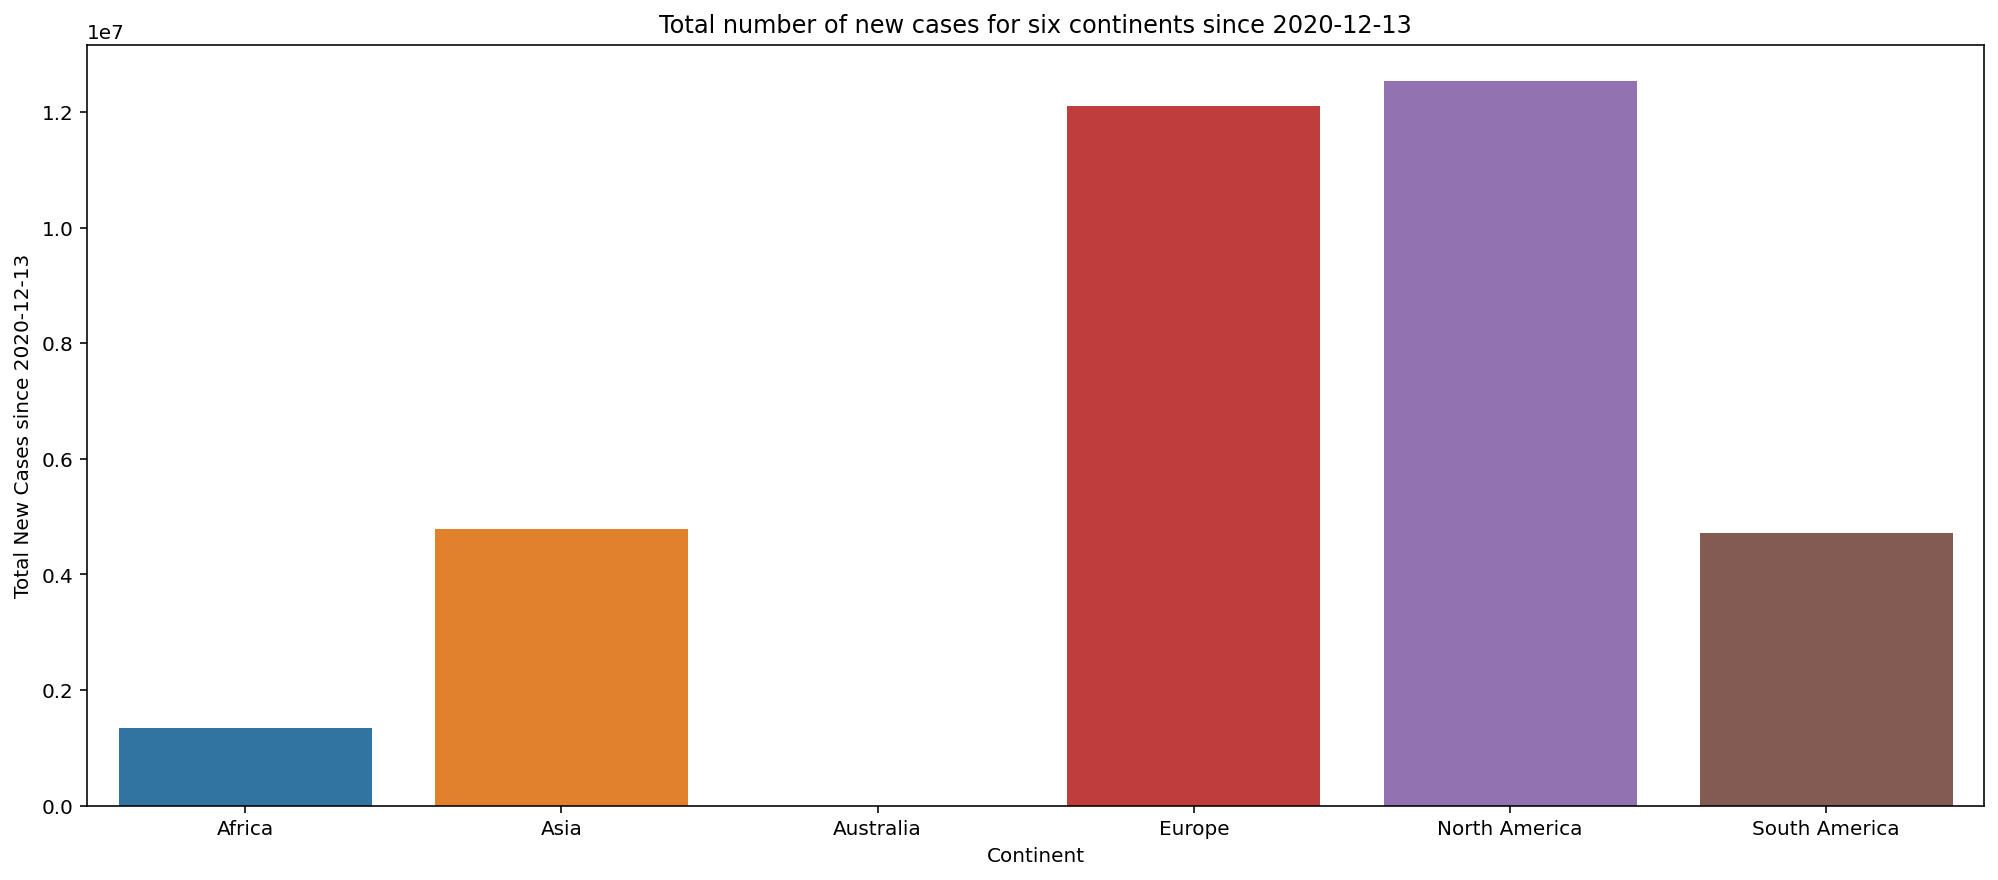

In [32]:
# Generate a barplot to compare the total number of new cases across six continents
sns.barplot(x = "Continent", y = "Total New Cases since 2020-12-13", data = continent_total_new_cases)
plt.title("Total number of new cases for six continents since 2020-12-13")

After exploring the data for the six continents, we would like to choose some representative countries in each continent to repeat the steps of calculating the total number of new cases, storing values into a new dataframe, and generating a barplot for conparison.

In [33]:
# Select some countries we are interested in and calculate the total number of new cases
total_new_safrica = new_cases["South Africa"].sum()
total_new_china = new_cases["China"].sum()
total_new_japan = new_cases["Japan"].sum()
total_new_australia = new_cases["Australia"].sum()
total_new_uk = new_cases["United Kingdom"].sum()
total_new_france = new_cases["France"].sum()
total_new_germany = new_cases["Germany"].sum()
total_new_us = new_cases["United States"].sum()
total_new_canada = new_cases["Canada"].sum()
total_new_brazil = new_cases["Brazil"].sum()

In [34]:
# Construct a new dataframe that contains total number of new cases for selected countries
country_df = {"Country":["South Africa", "China", "Japan", "Australia", "United Kingdom", "France", "Germany", 
                           "United States", "Canada", "Brazil"],
              "Total New Cases since 2020-12-13":[total_new_safrica, total_new_china, total_new_japan, 
                                                  total_new_australia, total_new_uk, total_new_france, 
                                                  total_new_germany, total_new_us, total_new_canada, total_new_brazil]}
country_total_new_cases = pd.DataFrame(country_df)
country_total_new_cases

,Country,Total New Cases since 2020-12-13
0,South Africa,629447.0
1,China,6277.0
2,Japan,232162.0
3,Australia,849.0
4,United Kingdom,2160884.0
5,France,1037809.0
6,Germany,975196.0
7,United States,11065371.0
8,Canada,360228.0
9,Brazil,2779040.0


Text(0.5, 1.0, 'Total number of new cases for selected countries since 2020-12-13')

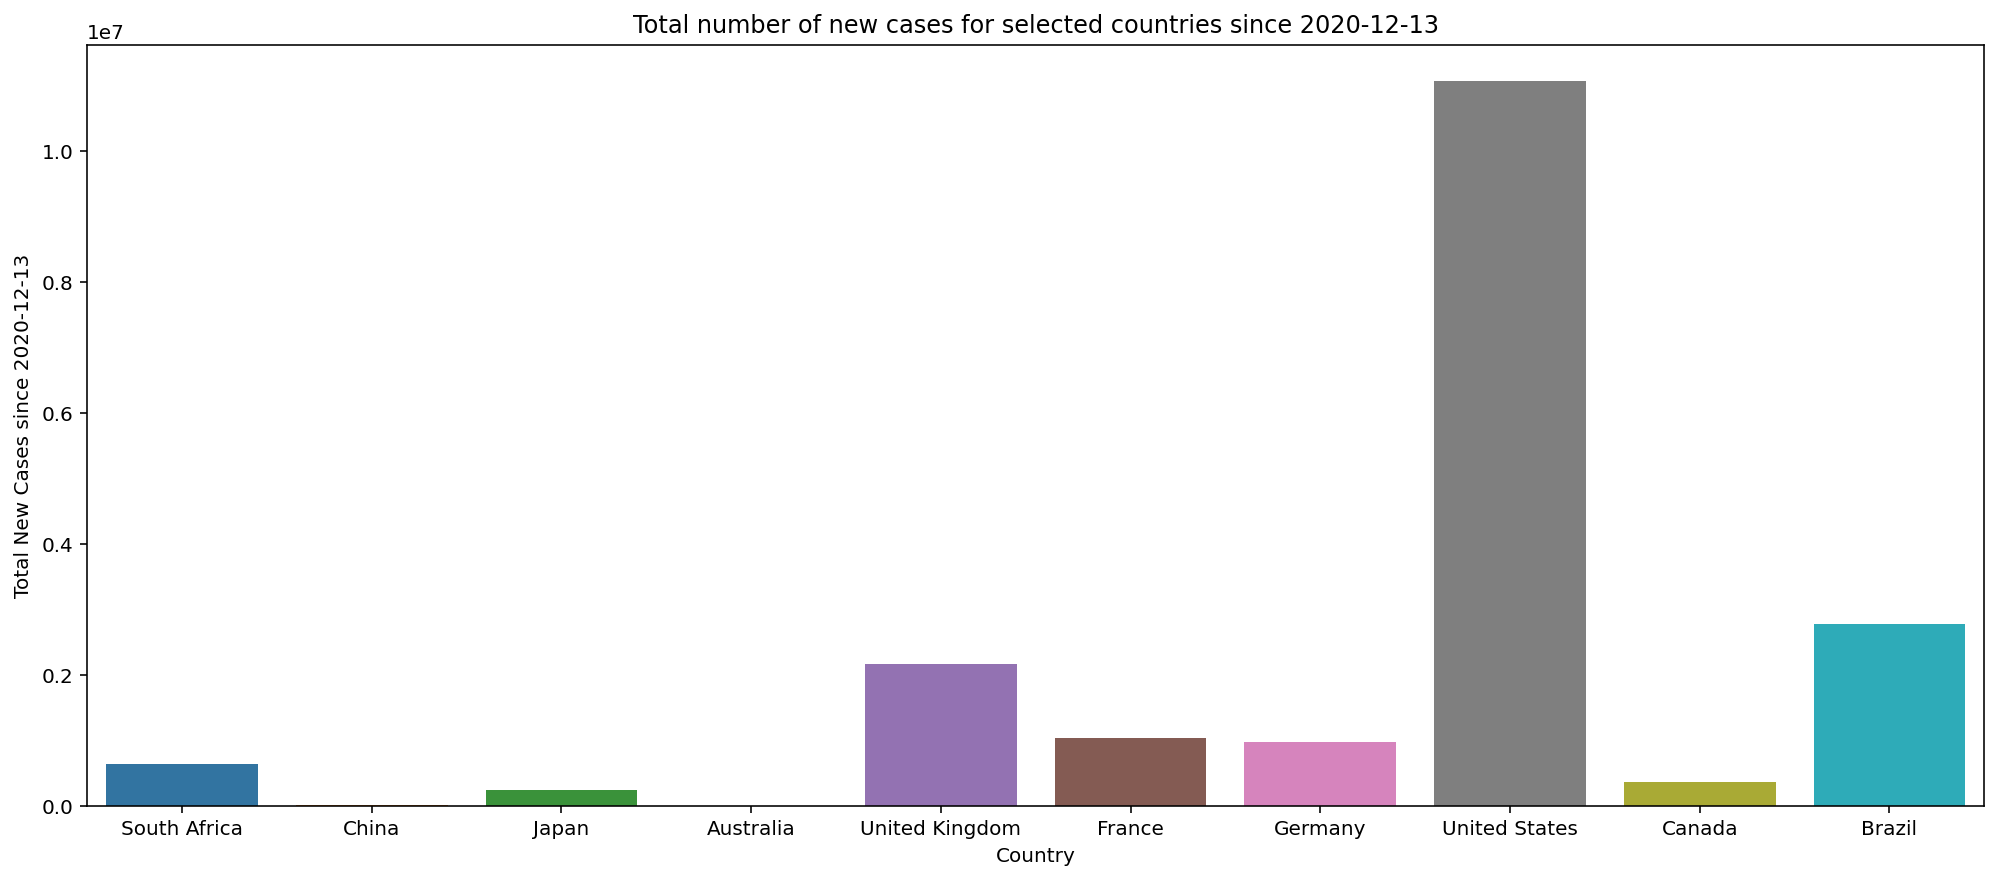

In [35]:
# Generate a barplot to compare the total number of new cases across selected countries
sns.barplot(x = "Country", y = "Total New Cases since 2020-12-13", data = country_total_new_cases)
plt.title("Total number of new cases for selected countries since 2020-12-13")

In this bar plot, we can see that the US has a very large number of total new cases, suggesting that the condition might be out of control recently. Therefore, we would like to explore the change in new cases over time for US specifcally to see the reason behind it.

Text(0, 0.5, 'Number of New Cases')

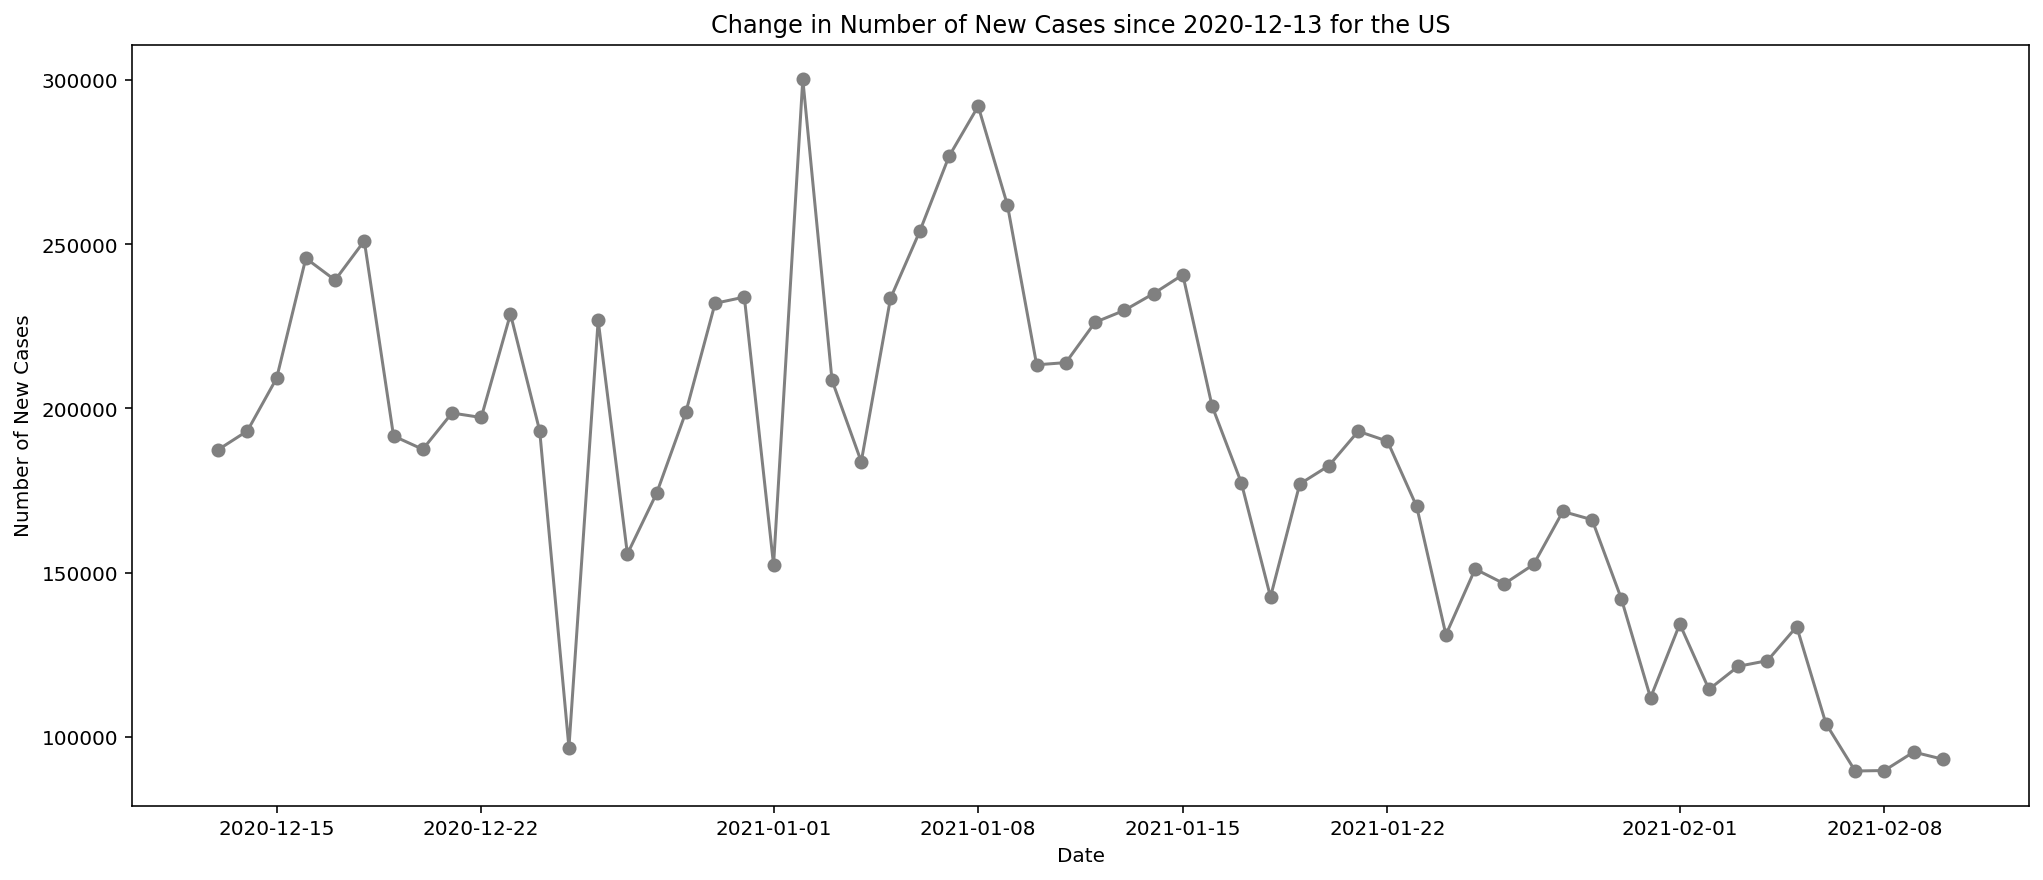

In [36]:
# Plot the change in number of new cases over time for the US
plt.plot(new_cases["Date"], new_cases["United States"], color="gray", marker='o')
plt.title("Change in Number of New Cases since 2020-12-13 for the US")
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

Text(0, 0.5, 'Number of New Cases')

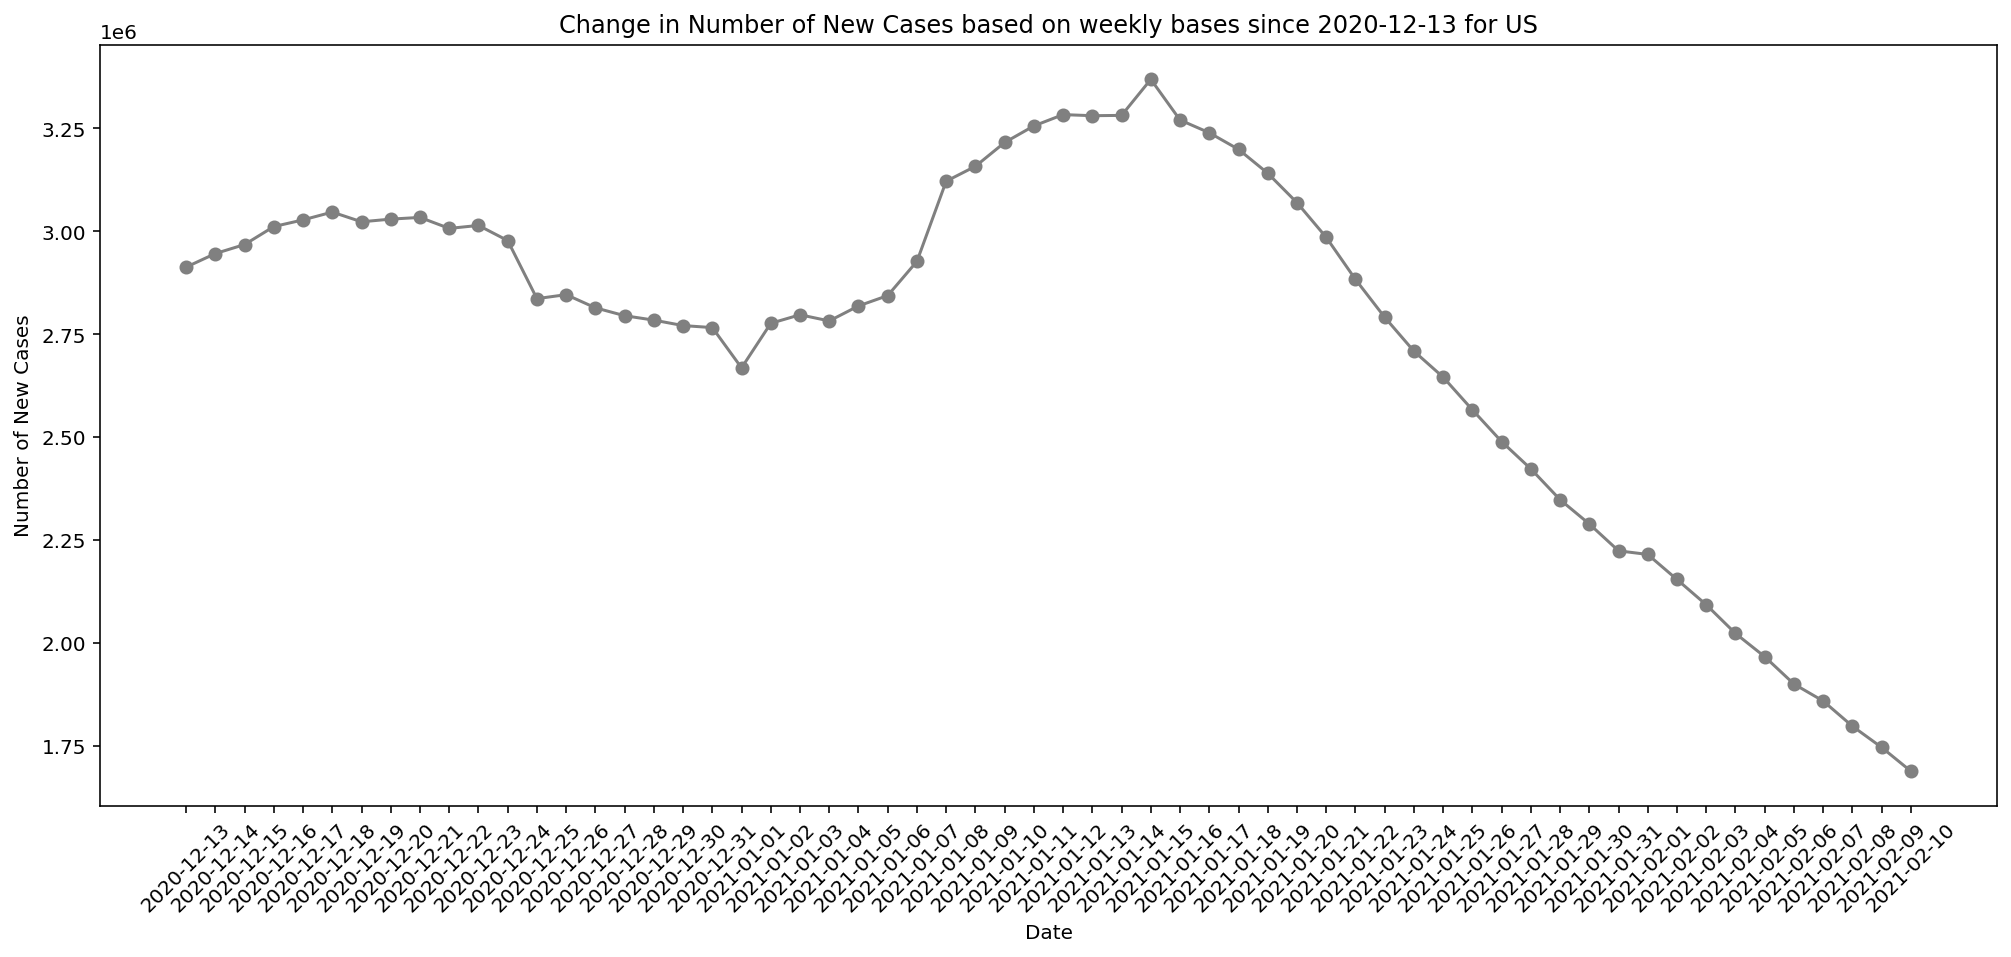

In [37]:
# Give the plot of the change in number of new cases over week for US
plt.xticks(rotation = 45)
plt.plot(weekly_data["Date"], weekly_data["United States"], color="gray", marker='o')
plt.title("Change in Number of New Cases based on weekly bases since 2020-12-13 for US")
plt.xlabel("Date")
plt.ylabel("Number of New Cases")

From these two plots (daily based and weekly based), we could see the overall trend of new cases in the US is in fact decreasing, notably since 2021-01-15, instead of being out of control. Therefore, even though the total number of new cases for the US is much larger than other countries, it might due to a large base of confirmed cases before the use of vaccines. Since the day vaccinations has started, the US has also responded to it as there have been less new cases recently. We suggest that the vaccines are starting to have the effect.

With a sense of the global COVID condition since the first day of reported vaccination data, we would like to illustrate the change in the number of world new cases over time also since that day.

Text(0, 0.5, 'Number of World New Cases')

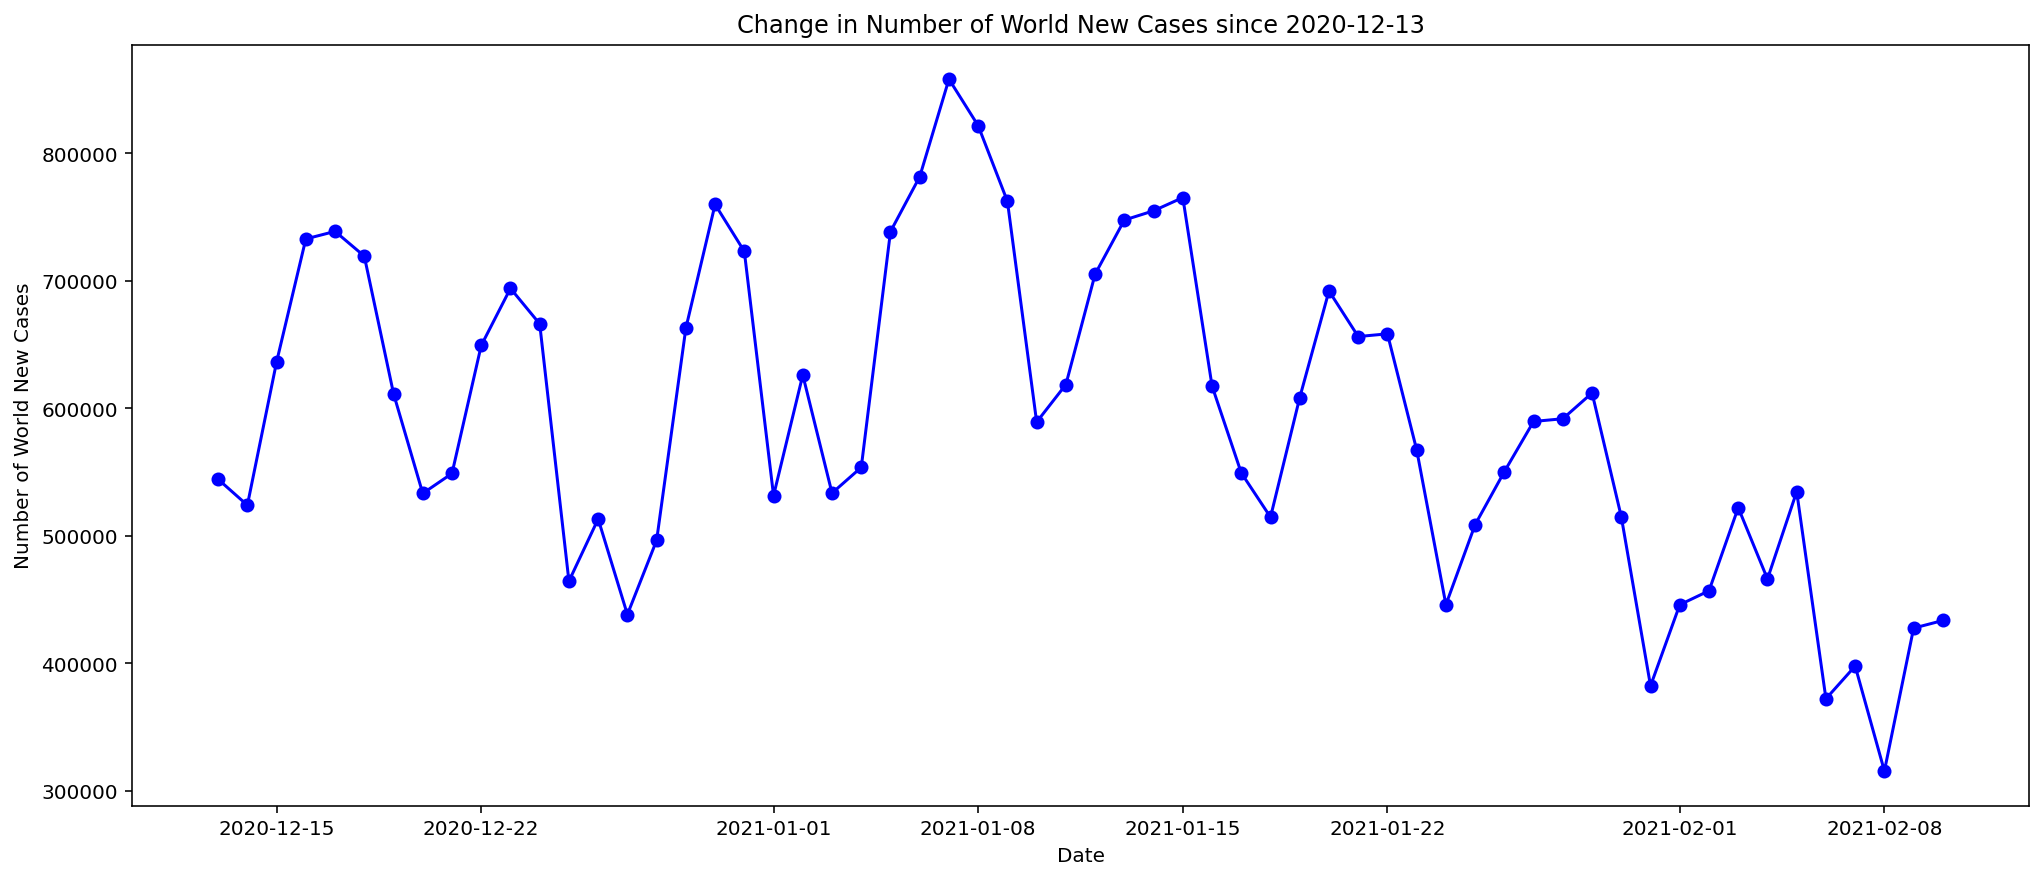

In [38]:
# Plot the change in number of world new cases over time
plt.plot(new_cases['Date'], new_cases['World'], color='blue', marker='o')
plt.title("Change in Number of World New Cases since 2020-12-13")
plt.xlabel("Date")
plt.ylabel("Number of World New Cases")

Text(0, 0.5, 'Number of World New Cases')

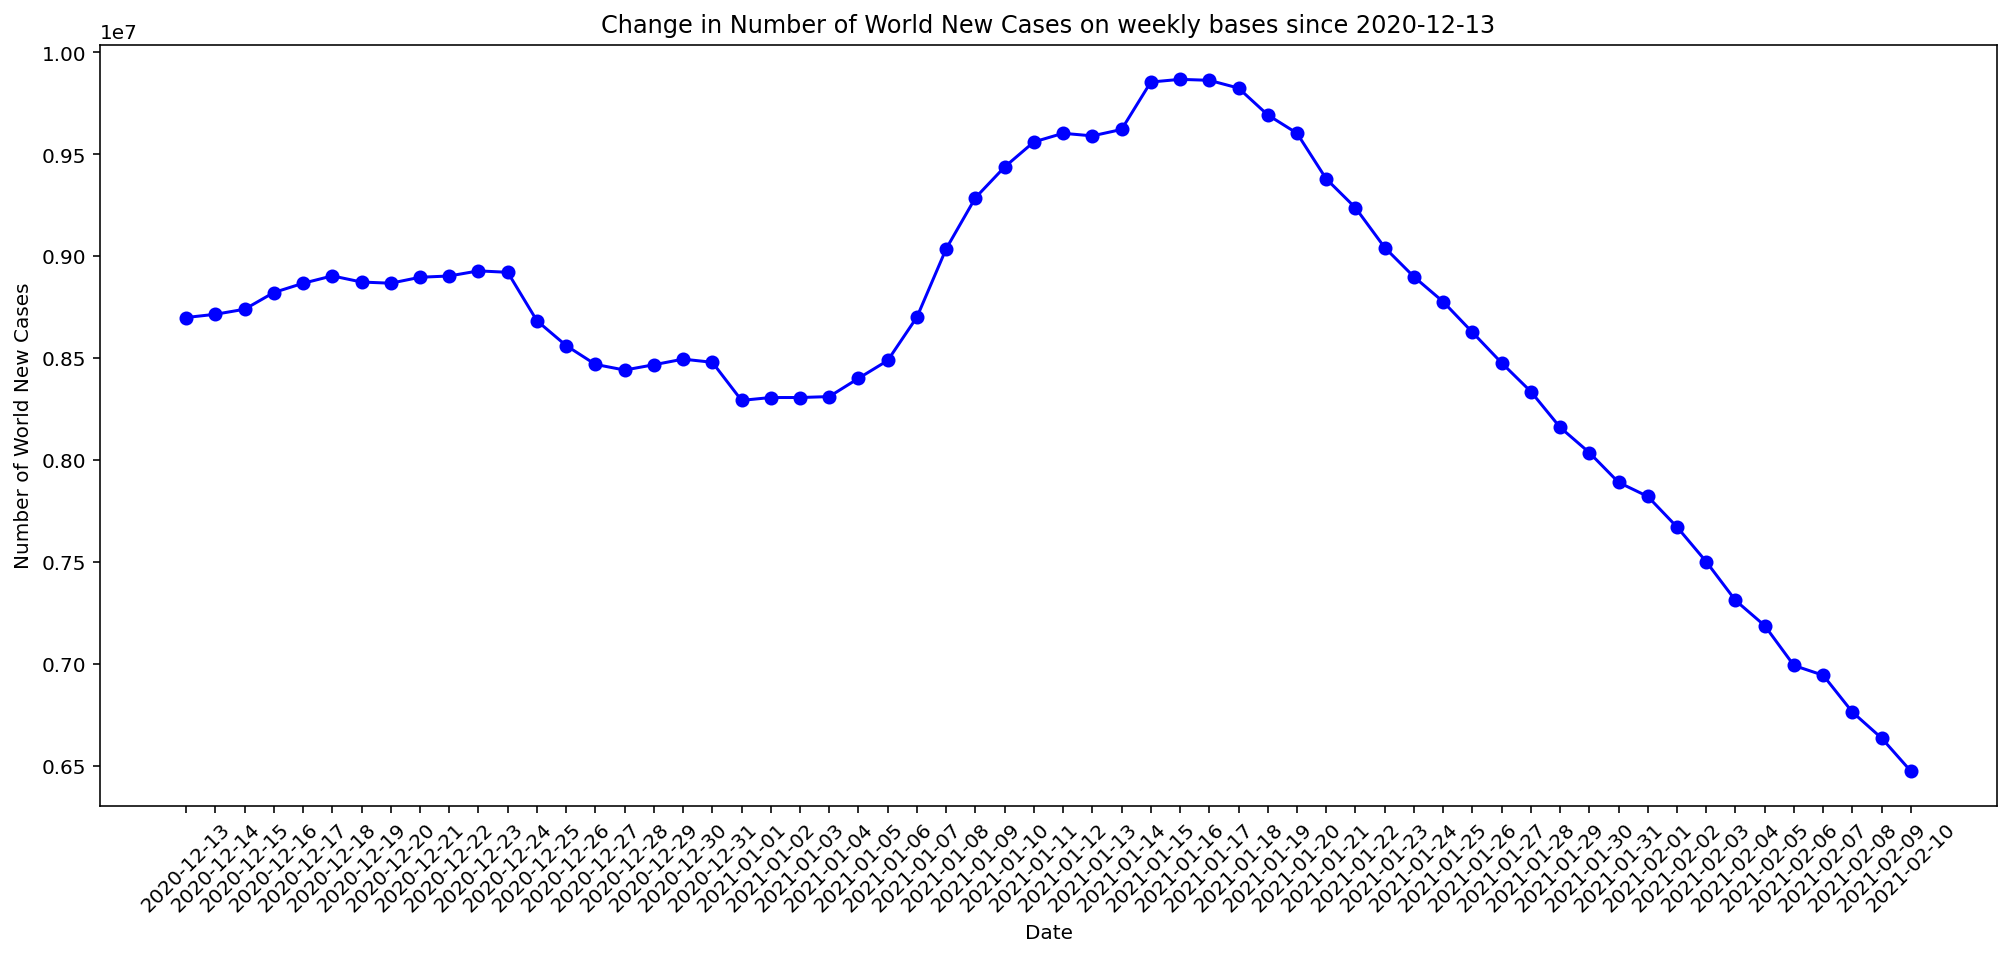

In [39]:
# Give the plot of the change in number of world new cases over week
plt.xticks(rotation = 45)
plt.plot(weekly_data['Date'], weekly_data['World'], color='blue', marker='o')
plt.title("Change in Number of World New Cases on weekly bases since 2020-12-13")
plt.xlabel("Date")
plt.ylabel("Number of World New Cases")

From these two plots, we could see the overall trend of new cases is decreasing (Either from dayily base or weekly base). Even though there are some fluctations, the overall trend is still down, notably since 2021-01-15. Therefore, the vaccines are starting to have the effect in not only the US but also countries around the world. In the next section, we will use a linear regression to find out the relationship between these two factors.

Also, through the plots above, We can see that the weekly graph has a larger effect than the daily graph, that is, the number of people diagnos(ed per week （second graph) has a more significant downward trend than the number of people diagnosed per day(first garph). This suggests that in the long term, the number of diagnoses is falling steadily.

# Data Analysis & Results

In order to discover the linear relationship between variables, we would need to use OLS regression to further verify the relationship. Also, this model can measure the strength of the realtionship.

For the first step, we would like to discover the realtionship between vaccination rate and total world cases.

## World

Text(0.5, 1.0, 'Relationship between vaccination rate and new confirmed cases')

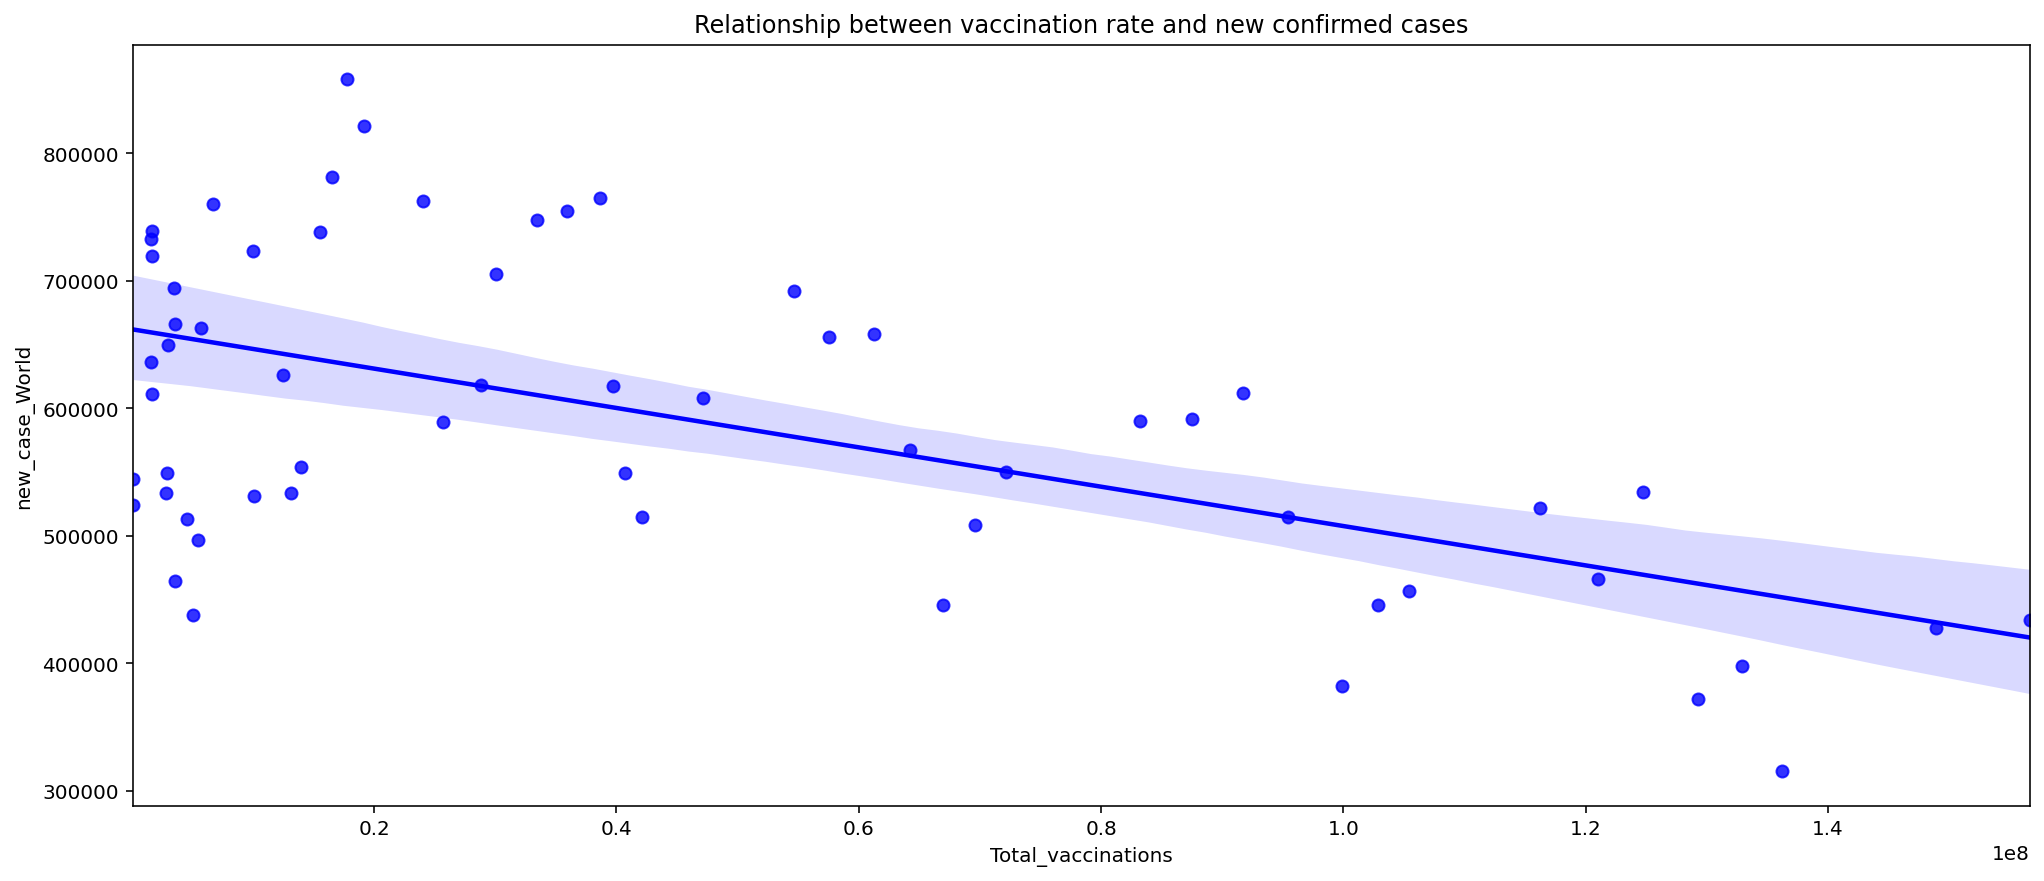

In [40]:
##new cases in the whole world
new_cases_temp = new_cases[['World']]

##total vaccination number for the world 
total_vaccines = vaccine[vaccine['Country'] == 'World']
total_vaccines = total_vaccines['Total_vaccinations']
total_vaccines = total_vaccines.dropna()

##merge two datasets
total_vaccines.drop(total_vaccines.index[[0, 1, 2]],axis=0)
total_vaccines = total_vaccines.reset_index()
total_vaccines['new_case_World'] = new_cases_temp['World']

##show their relationships
sns.regplot(x='Total_vaccinations', y='new_case_World', data=total_vaccines, color='blue')
plt.title("Relationship between vaccination rate and new confirmed cases")

This plot shows the relationship between vaccination rate and new confirmed cases. From the regression line above, it can be seen that there is a roughly negative linear relationship. In another word, as the number of vaccinations increase, the number of new confirmed cases will decrease. And based on the distribution of these datapoints, this relationship is kind of strong. The regression here may prove our initial hypothesis is correct, but it still need further test analysis to measure whether it is significant enough.

In [41]:
# Linear model between vaccination rate and World New Cases
outcome, predictors = patsy.dmatrices('new_case_World ~ Total_vaccinations', total_vaccines)
model = sm.OLS(outcome, predictors)
result_world = model.fit()
print(result_world.summary())

                            OLS Regression Results                            
Dep. Variable:         new_case_World   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     29.22
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.27e-06
Time:                        07:55:08   Log-Likelihood:                -775.74
No. Observations:                  60   AIC:                             1555.
Df Residuals:                      58   BIC:                             1560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.619e+05   1.85

  ***Wolrd_New Cases = -0.0016 * total_vaccinations***

In [42]:
p1vals = result_world.pvalues[1]
alpha = 0.01
if(p1vals < alpha):
    print("P-value is less than the alpha value, the relationship is significant")
else:
    print("P-value is larger than the alpha value, the relationship is not significant")

P-value is less than the alpha value, the relationship is significant


For the second step, we will choose some representative countries like United Kingdoms or United States and present their regressions.

## United Kingdom

In [43]:
##new cases in the United Kingdom
new_cases_temp = new_cases[['United Kingdom']]

In [44]:
##total vaccination number for United Kingdom
UK_vaccines = vaccine[vaccine['Country'] == 'United Kingdom']
UK_vaccines = UK_vaccines['Total_vaccinations'].reset_index(drop = True)
UK_vaccines = UK_vaccines.dropna()

In [45]:
##merge two datasets
UK_vaccines.drop(UK_vaccines.index[[0, 1, 2]],axis=0)
UK_vaccines = UK_vaccines.reset_index()
UK_vaccines['new_case_UK'] = new_cases_temp['United Kingdom']

Text(0.5, 1.0, 'Relationship between vaccination rate and new confirmed cases')

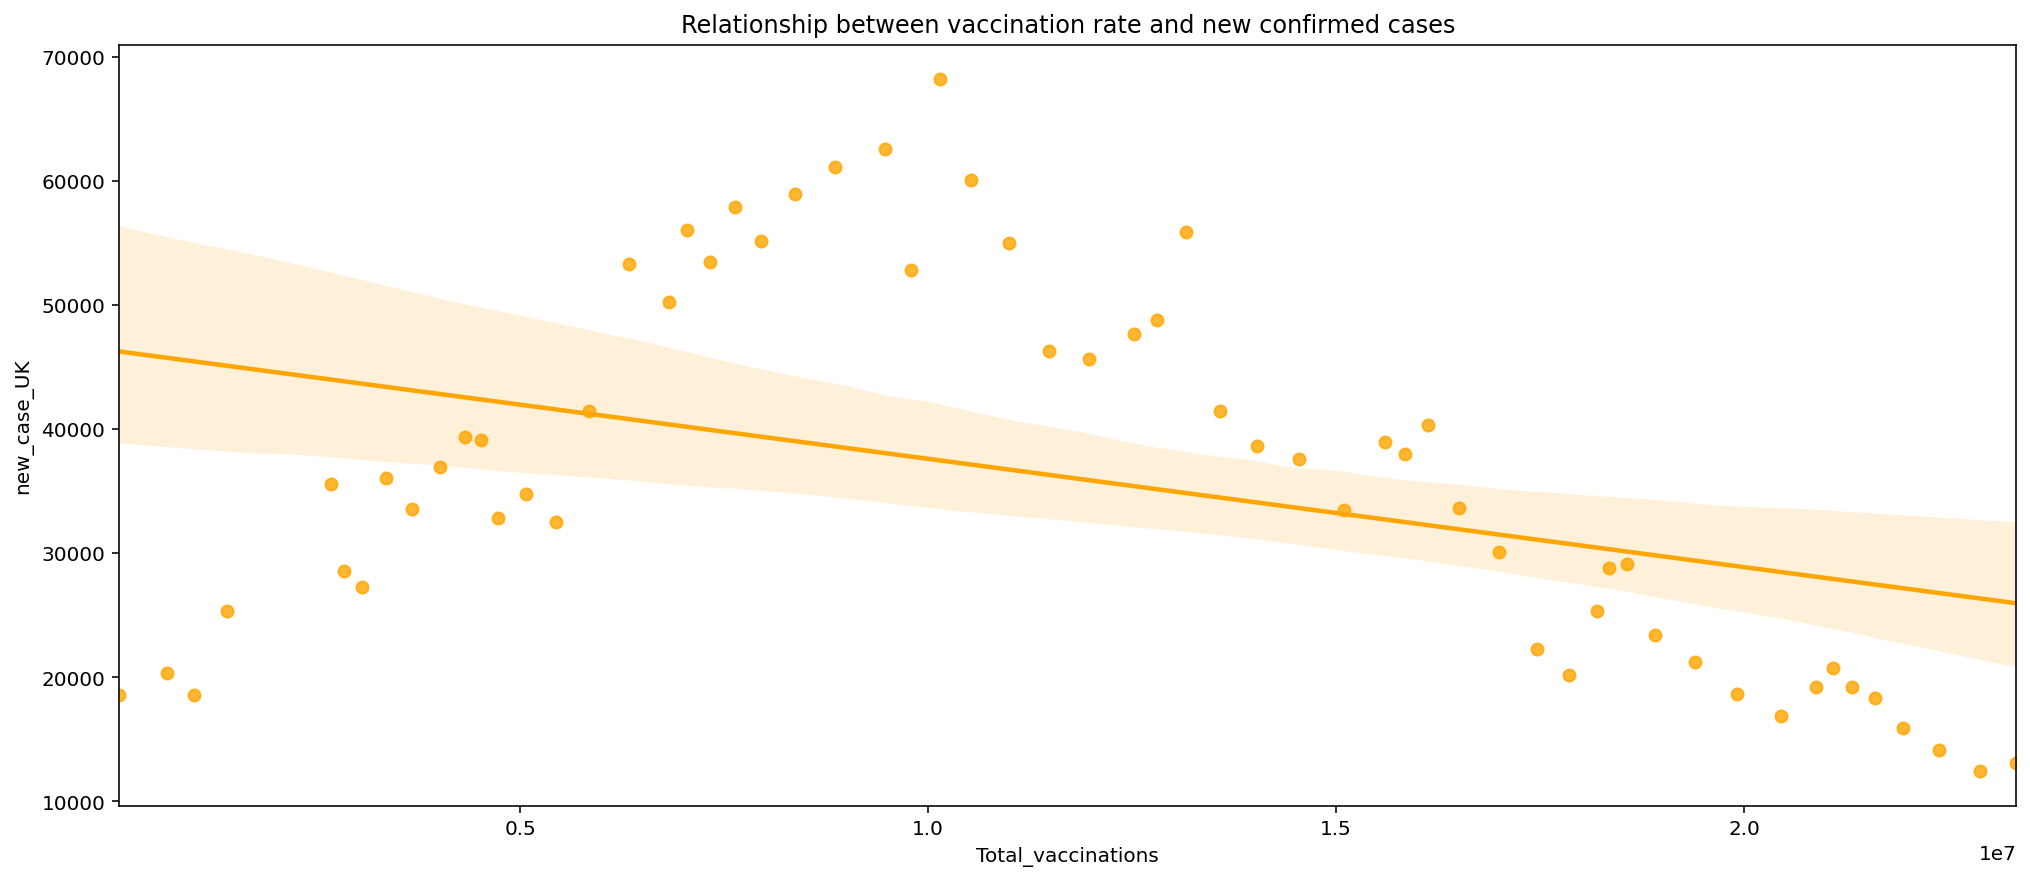

In [46]:
##show their relationships
sns.regplot(x='Total_vaccinations', y='new_case_UK', data=UK_vaccines, color='orange')
plt.title("Relationship between vaccination rate and new confirmed cases")

In [47]:
# Linear model between vaccination rate and new cases in United Kingdom
outcome, predictors = patsy.dmatrices('new_case_UK ~ Total_vaccinations', UK_vaccines)
model = sm.OLS(outcome, predictors)
result_uk = model.fit()
print(result_uk.summary())

                            OLS Regression Results                            
Dep. Variable:            new_case_UK   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     11.11
Date:                Thu, 11 Mar 2021   Prob (F-statistic):            0.00150
Time:                        07:55:09   Log-Likelihood:                -656.00
No. Observations:                  60   AIC:                             1316.
Df Residuals:                      58   BIC:                             1320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.633e+04   3569

In [48]:
p1vals = result_uk.pvalues[1]
alpha = 0.01
if(p1vals < alpha):
    print("P-value is less than the alpha value, the relationship is significant")
else:
    print("P-value is larger than the alpha value, the relationship is not significant")

P-value is less than the alpha value, the relationship is significant


## United States

In [49]:
##new cases in the United States
new_cases_temp = new_cases[['United States']]

In [50]:
##total vaccination number for United States
US_vaccines = vaccine[vaccine['Country'] == 'United States']
US_vaccines = US_vaccines['Total_vaccinations'].reset_index(drop = True)
US_vaccines = US_vaccines.dropna()

In [51]:
##merge two datasets
US_vaccines.drop(US_vaccines.index[[0, 1, 2]],axis=0)
US_vaccines = US_vaccines.reset_index()
US_vaccines['new_case_US'] = new_cases_temp['United States']

Text(0.5, 1.0, 'Relationship between vaccination rate and new confirmed cases')

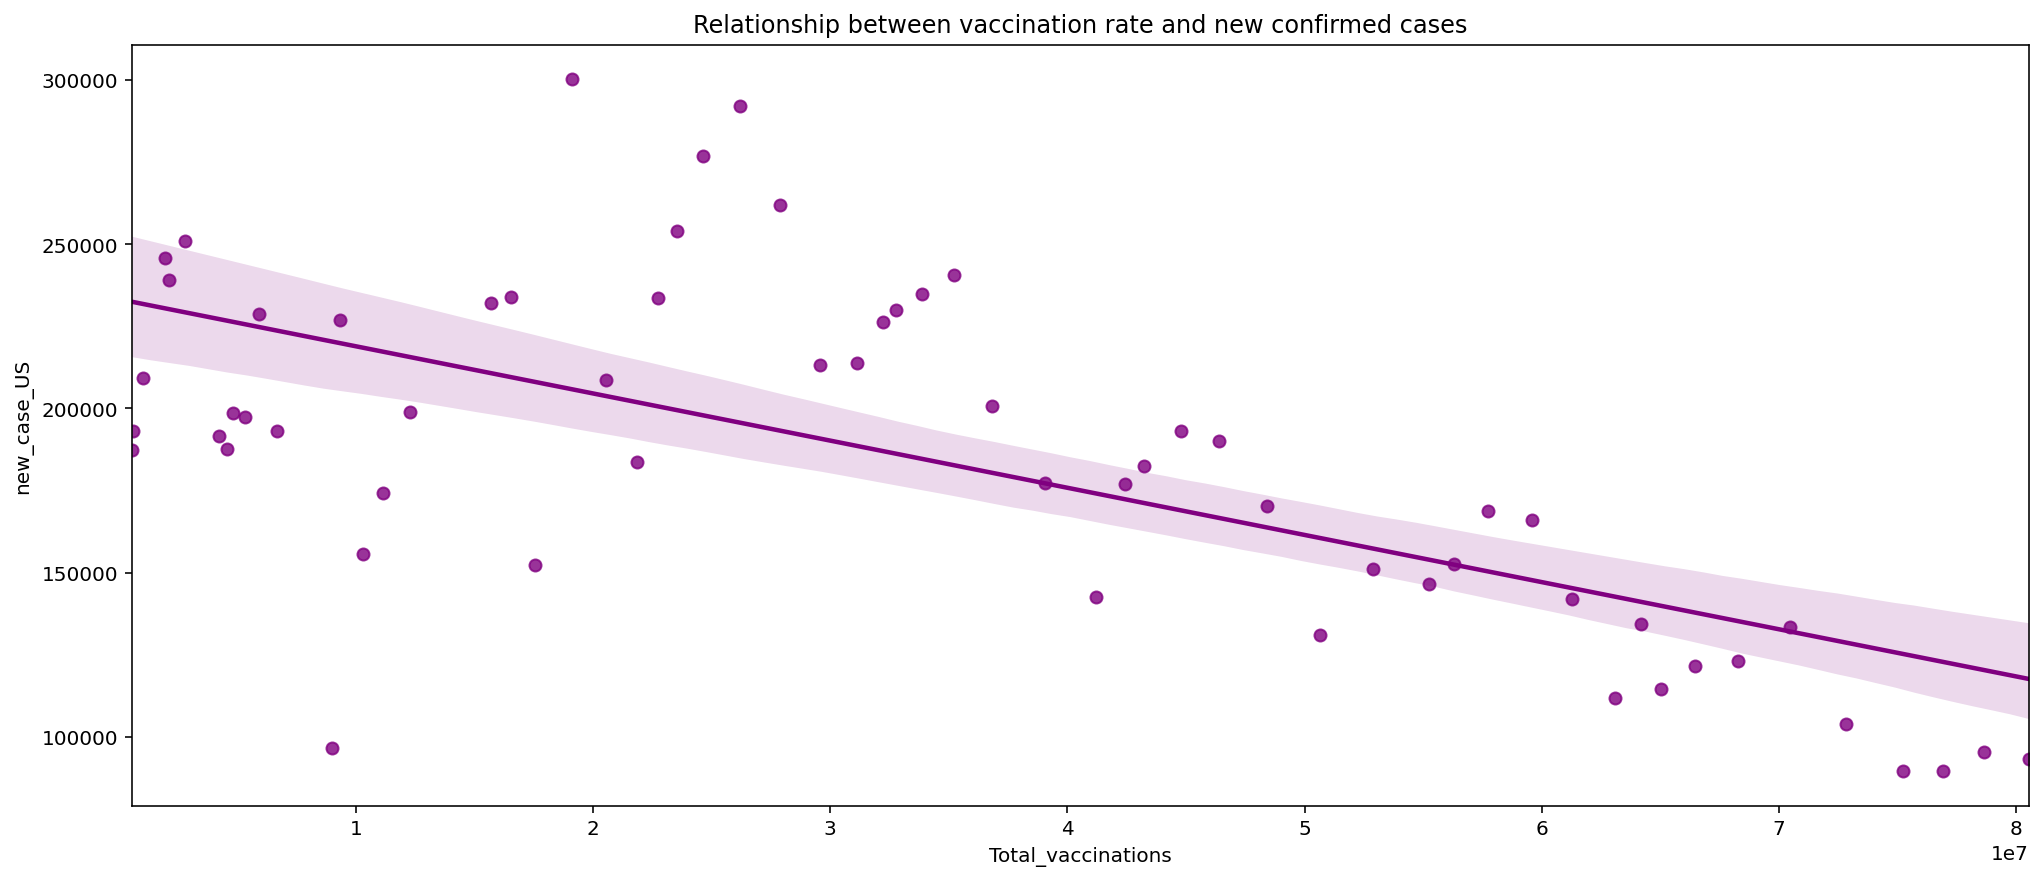

In [52]:
##show their relationships
sns.regplot(x='Total_vaccinations', y='new_case_US', data=US_vaccines, color='purple')
plt.title("Relationship between vaccination rate and new confirmed cases")

In [53]:
# Linear model between vaccination rate and new cases in United States
outcome, predictors = patsy.dmatrices('new_case_US ~ Total_vaccinations', US_vaccines)
model = sm.OLS(outcome, predictors)
result_us = model.fit()
print(result_us.summary())

                            OLS Regression Results                            
Dep. Variable:            new_case_US   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     47.31
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           4.69e-09
Time:                        07:55:09   Log-Likelihood:                -719.14
No. Observations:                  60   AIC:                             1442.
Df Residuals:                      58   BIC:                             1446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.333e+05   8744

In [54]:
p1vals = result_us.pvalues[1]
alpha = 0.01
if(p1vals < alpha):
    print("P-value is less than the alpha value, the relationship is significant")
else:
    print("P-value is larger than the alpha value, the relationship is not significant")

P-value is less than the alpha value, the relationship is significant


## Belgium

In [55]:
##new cases in the Belgium
new_cases_temp = new_cases[['Denmark']]

In [56]:
##total vaccination number for Belgium
Denmark_vaccines = vaccine[vaccine['Country'] == 'Denmark']
Denmark_vaccines = Denmark_vaccines['Total_vaccinations'].reset_index(drop = True)
Denmark_vaccines = Denmark_vaccines.dropna()

In [57]:
##merge two datasets
Denmark_vaccines.drop(Denmark_vaccines.index[[0, 1, 2]],axis=0)
Denmark_vaccines = Denmark_vaccines.reset_index()
Denmark_vaccines['new_case_Denmark'] = new_cases_temp['Denmark']

Text(0.5, 1.0, 'Relationship between vaccination rate and new confirmed cases')

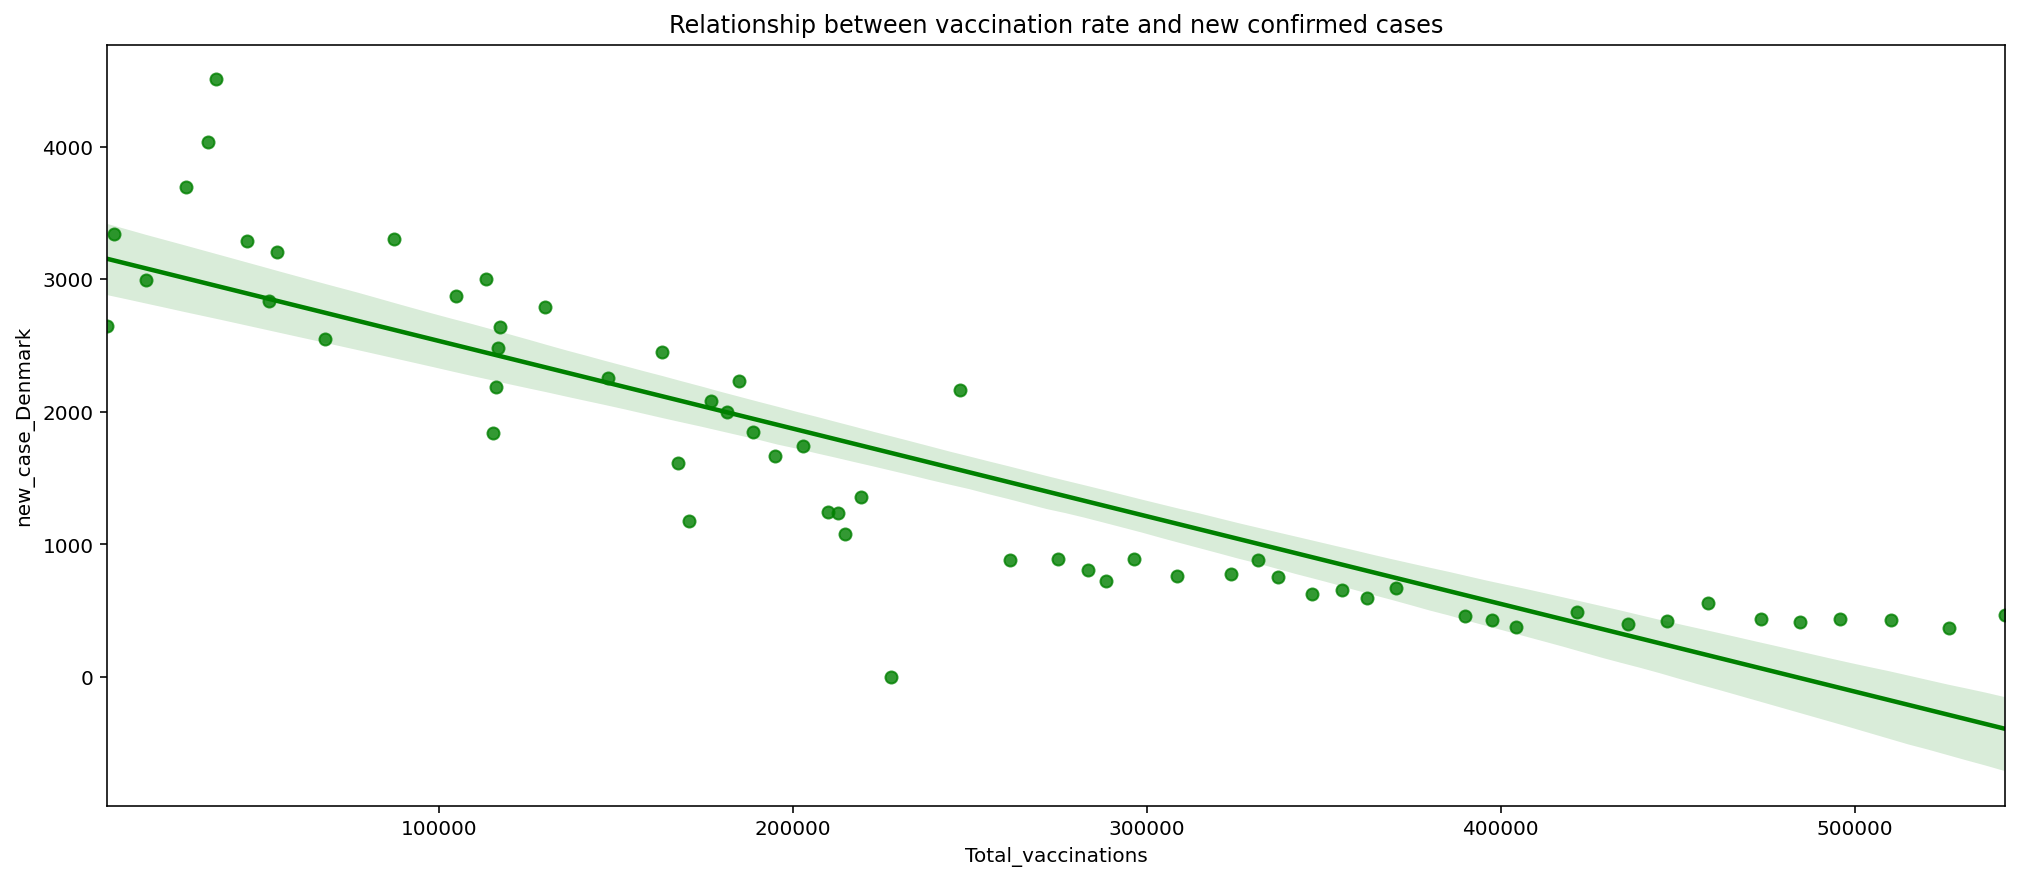

In [58]:
##show their relationships
sns.regplot(x='Total_vaccinations', y='new_case_Denmark', data=Denmark_vaccines, color='green')
plt.title("Relationship between vaccination rate and new confirmed cases")

In [59]:
# Linear model between vaccination rate and new cases in Belgium
outcome, predictors = patsy.dmatrices('new_case_Denmark ~ Total_vaccinations', Denmark_vaccines)
model = sm.OLS(outcome, predictors)
result_denmark = model.fit()
print(result_denmark.summary())

                            OLS Regression Results                            
Dep. Variable:       new_case_Denmark   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     212.6
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           4.67e-21
Time:                        07:55:10   Log-Likelihood:                -460.24
No. Observations:                  60   AIC:                             924.5
Df Residuals:                      58   BIC:                             928.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3195.5323    128

In [60]:
p1vals = result_denmark.pvalues[1]
alpha = 0.01
if(p1vals < alpha):
    print("P-value is less than the alpha value, the relationship is significant")
else:
    print("P-value is larger than the alpha value, the relationship is not significant")

P-value is less than the alpha value, the relationship is significant


## Germany

In [61]:
# New cases in the Germany
new_cases_temp = new_cases[['Germany']]

In [62]:
# Total vaccination number for Germany
Germany_vaccines = vaccine[vaccine['Country'] == 'Germany']
Germany_vaccines = Germany_vaccines['Total_vaccinations'].reset_index(drop = True)
Germany_vaccines = Germany_vaccines.dropna()

In [63]:
# Merge two datasets
Germany_vaccines.drop(Germany_vaccines.index[[0, 1, 2]],axis=0)
Germany_vaccines = Germany_vaccines.reset_index()
Germany_vaccines['new_case_Germany'] = new_cases_temp['Germany']

Text(0.5, 1.0, 'Relationship between vaccination rate and new confirmed cases')

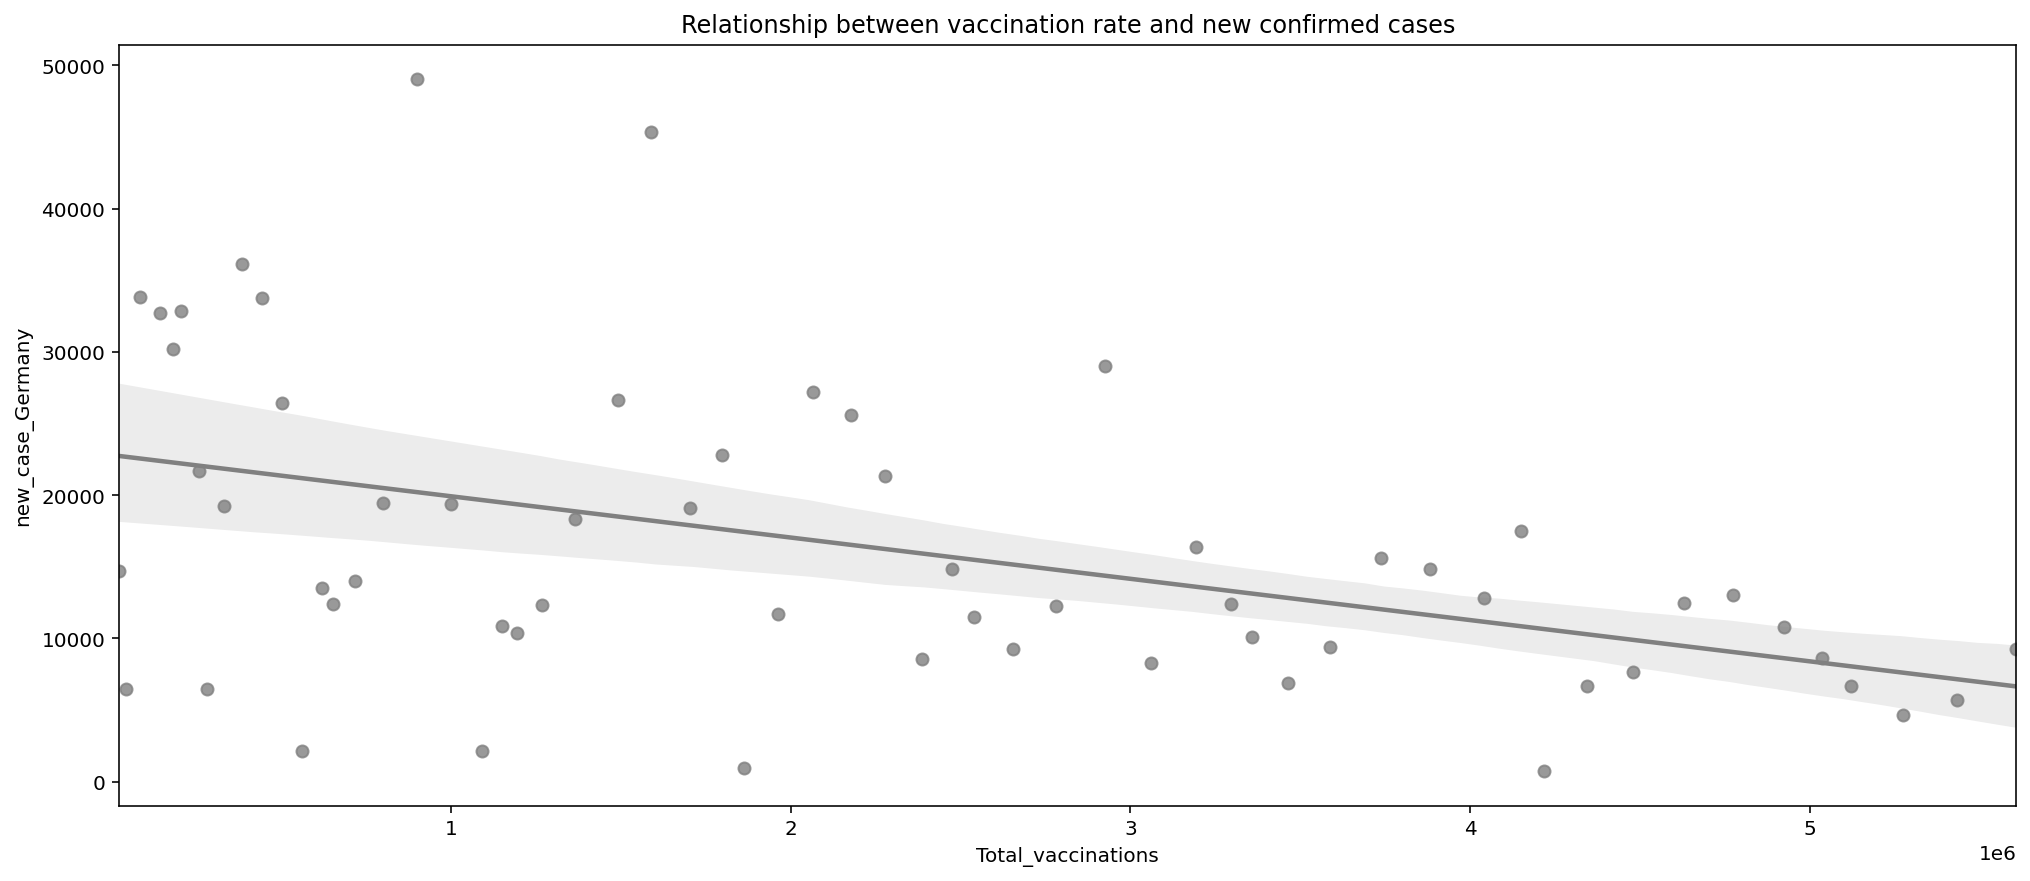

In [64]:
# Show their relationships
sns.regplot(x='Total_vaccinations', y='new_case_Germany', data=Germany_vaccines, color='gray')
plt.title("Relationship between vaccination rate and new confirmed cases")

In [65]:
# Linear model between vaccination rate and new cases in Belgium
outcome, predictors = patsy.dmatrices('new_case_Germany ~ Total_vaccinations', Germany_vaccines)
model = sm.OLS(outcome, predictors)
result_germany = model.fit()
print(result_germany.summary())

                            OLS Regression Results                            
Dep. Variable:       new_case_Germany   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     15.63
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           0.000211
Time:                        07:55:10   Log-Likelihood:                -633.77
No. Observations:                  60   AIC:                             1272.
Df Residuals:                      58   BIC:                             1276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.281e+04   2063

In [66]:
p1vals = result_germany.pvalues[1]
alpha = 0.01
if(p1vals < alpha):
    print("P-value is less than the alpha value, the relationship is significant")
else:
    print("P-value is larger than the alpha value, the relationship is not significant")

P-value is less than the alpha value, the relationship is significant


# Ethics & Privacy

In this project, three sets of data are collected, all of which are made public on Github to encourage usage for either research or personal purposes. The csv files are open to download and any suggestions that can improve their accuracy and completeness.

In the Vaccination Rate dataset, only state names, date, and relevant statistics such as total vaccinations available and number of people vaccinated were revealed. Personal information such as name, gender, and address were not shown, so anonymization was implemented and there should be no privacy issues. Similarly, the World Data and the Weekly Data datasets both revealed only statistics for the current COVID-19 conditions and contained no private information that could allow users to identify certain individual being infected.

Since the data are collected by WWO and Johns Hopkins University as a continuous update on the COVID-19 conditions and are simply objective types of data including state names and numerical values, we expected them to be unbiased.

However, because we only consider the number of cases, the effect of vaccines may be misrepresented. For example, vaccine may show less effect in a country where covid cases are more widespread as there will have more people who are immune to the virus, than a country that have less immune people because of the less exposure to the virus due to lockdown. Therefore, our conclusion will be made carefully with the consideration of the potential bias.

Throughout the whole project, all group members used the data appropriately, with respect, and with minimized bias during cleaning, EDA, and analysis. We clearly explained each step to ensure understanding from the readers. Whenever a conclusion is drawn from the analysis, we discussed its implications and brainstormed any potential negative consequences before making this conclusion public.

# Conclusion

By fitting a linear model for our predictor and outcome, we concluded that the number of new COVID cases is negatively correlated to the number of people who got vaccinated such that, as the number of vaccinations increase, the number of new confirmed cases should decrease. However, it needs to be mentioned that the correlation coefficient is close to 0, indicating a weak correlation between the two variables and some potential confounding variables that can result in this decrease in new confirmed cases. In addition, by looking at the correlation within different countries, the strengths of the correlations are also different and have values close to 0.

In addition, according to the t-test performed for the world new cases and total vaccinations data, we obtained a p-value smaller than our alpha level, so we decided to reject our null hypothesis that increased vaccination can lead to a decrease in new confirmed cases.

Based on this conclusion, we came up with some explanations for it. The weak correlation observed may due to some confounding variables. For example, it is possible that people are being more aware of protecting themselves as the condition gets more severe over time, so the number of new cases can be controlled. Also, the conditions for each country are different, such as the gaps in medical capability or population density. All these factors may strengthen or weaken the correlation and are potential biases that are difficult to be avoided. In order to address this issue, some future works focusing on predictors including awareness of having protections, medical conditions, and population can be done to provide a more comprehensive conclusion.


# Project Proposal (updated)

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/14  | 6 PM  | Form a group of four | Edit, finalize, and submit Project Planning Survey (Due 1/15 11:59pm) |
| 1/21  | 6 PM  | Review the assigned previous project | Edit, finalize, and submit Previous Project Review (Due 1/22 11:59pm) |
| 1/28  |  6 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions/hypothesis; Do background and dataset research; Begin drafting the project proposal; | Edit, finalize, and submit Project Proposal (Due 1/29 11:59pm) | 
| 2/4  | 6 PM  | Explore the datasets; Think about possible wrangling & analysis approaches | Discuss the approaches; Assign group members to lead each specific part |
| 2/11  | 6 PM  | Begin data wrangling | Address any issues encountered; Edit, finalize, and submit Checkpoint #1: Data (Due 2/12 11:59pm) |
| 2/18  | 6 PM  | Begin data analysis & Results | Address any issues encountered |
| 2/25  | 6 PM  | Continue data analysis Results; Begin drafting conclusions/discussions | Address any issues encountered; Edit, finalize, and submit Checkpoint #2: EDA (Due 2/26 11:59pm) |
| 3/4  | 6 PM  | Continue drafting conclusions/discussions | Address any issues encountered; Discuss improvements; Plan video recording |
| 3/11  | 6 PM  | Prepare scripts for the final video | Record the final video |
| 3/14  | 6 PM  | Check everything  | Edit, finalize, and submit Final Report, Final Video, and Team Evaluation (Due 3/17 11:59pm) |

# Team Contributions

Feifan Li: Worked on Introduction, Data Collection, EDA & Data Cleaning for Vaccination Rate, and Data Analysis & Results.

Kexin Cheng: Worked on EDA for Weekly New Cases Data. Contributed to Data Cleaning for Weekly New Cases Data, Overview, and Hypothesis.

Kesin Chang: Worked on Data Cleaning for Weekly New Cases Data, Video, and Introduction. Contributed to Ethic & Privacy, and Datasets.

Ziyue Chen: Worked on Setup and Data Cleaning & EDA for World New Cases Data. Contributed to Data Analysis & Results, Ethics & Privacy, and Conclusion.

All helped each other with coding problems and writeups.